<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://drive.google.com/file/d/1KB2VMK54HxbRoqaN0cEPlW--bZwWOpLy/view?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>

# <p style="text-align:center" color="red"><span style="color:red">Recommender System Project</span></p>
## <p style="text-align:center" color="red"><span style="color:green">`Recommender System `Project `Movie Recommendation System`</span></p>

- Abir Oumghar - `AMSD`


## Movie Recommendation System using AutoRec in Cornac


### 1. Introduction:
Recommendation systems play a crucial role in personalized online experiences by suggesting relevant items to users. One popular approach to building recommendation systems is collaborative filtering, which leverages user-item interactions to make recommendations. In this project, our objective is to build a movie recommendation system using the AutoRec model implemented with the Cornac library.

AutoRec is an autoencoder-based model that captures the latent representations of users and items to learn their interactions. It has shown promising results in various recommendation tasks by exploiting the inherent structure and patterns in user-item interaction data.

The main goal of our project is to leverage the capabilities of the Cornac library and the AutoRec model to create a movie recommendation system that suggests relevant movies to users based on their historical preferences.


In [1]:
import pandas as pd

# Set the paths to the dataset files
links_path = 'C:\\Users\\ABIR°S ELITEBOOK\\Downloads\\ml-25m\\ml-25m\\links.csv'
ratings_path = 'C:\\Users\\ABIR°S ELITEBOOK\\Downloads\\ml-25m\\ml-25m\\ratings.csv'
movies_path = 'C:\\Users\\ABIR°S ELITEBOOK\\Downloads\\ml-25m\\ml-25m\\movies.csv'
genome_tags_path = 'C:\\Users\\ABIR°S ELITEBOOK\\Downloads\\ml-25m\\ml-25m\\genome-tags.csv'
genome_scores_path = 'C:\\Users\\ABIR°S ELITEBOOK\\Downloads\\ml-25m\\ml-25m\\genome-scores.csv'

# Load the datasets
links_df = pd.read_csv(links_path)
ratings_df = pd.read_csv(ratings_path)
movies_df = pd.read_csv(movies_path)
genome_tags_df = pd.read_csv(genome_tags_path)
genome_scores_df = pd.read_csv(genome_scores_path)

# Display the shapes of the datasets
print("Links dataset shape:", links_df.shape)
print("Ratings dataset shape:", ratings_df.shape)
print("Movies dataset shape:", movies_df.shape)
print("Genome Tags dataset shape:", genome_tags_df.shape)
print("Genome Scores dataset shape:", genome_scores_df.shape)


Links dataset shape: (62423, 3)
Ratings dataset shape: (25000095, 4)
Movies dataset shape: (62423, 3)
Genome Tags dataset shape: (1128, 2)
Genome Scores dataset shape: (15584448, 3)


In [2]:
# Describe the Links dataset
links_description = links_df.describe()

# Describe the Ratings dataset
ratings_description = ratings_df.describe()

# Describe the Movies dataset
movies_description = movies_df.describe()

# Describe the Genome Tags dataset
genome_tags_description = genome_tags_df.describe()

# Describe the Genome Scores dataset
genome_scores_description = genome_scores_df.describe()

# Display the descriptions
print("Links dataset description:\n", links_description)
print("\nRatings dataset description:\n", ratings_description)
print("\nMovies dataset description:\n", movies_description)
print("\nGenome Tags dataset description:\n", genome_tags_description)
print("\nGenome Scores dataset description:\n", genome_scores_description)


Links dataset description:
              movieId        imdbId         tmdbId
count   62423.000000  6.242300e+04   62316.000000
mean   122220.387646  1.456706e+06  155186.689999
std     63264.744844  2.098007e+06  153362.694700
min         1.000000  1.000000e+00       2.000000
25%     82146.500000  8.168650e+04   36768.750000
50%    138022.000000  3.258050e+05   86750.500000
75%    173222.000000  2.063724e+06  255255.250000
max    209171.000000  1.117094e+07  646282.000000

Ratings dataset description:
              userId       movieId        rating     timestamp
count  2.500010e+07  2.500010e+07  2.500010e+07  2.500010e+07
mean   8.118928e+04  2.138798e+04  3.533854e+00  1.215601e+09
std    4.679172e+04  3.919886e+04  1.060744e+00  2.268758e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    4.051000e+04  1.196000e+03  3.000000e+00  1.011747e+09
50%    8.091400e+04  2.947000e+03  3.500000e+00  1.198868e+09
75%    1.215570e+05  8.623000e+03  4.000000e+00  1.447205

2. Setup

In [3]:
import os
import sys

import cornac
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, sparse

%matplotlib inline

# Print system version
print(f"System version: {sys.version}")

# Print Cornac version
print(f"Cornac version: {cornac.__version__}")

c:\users\abir°s elitebook\appdata\local\programs\python\python36\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


FM model is only supported on Linux.
Windows executable can be found at http://www.libfm.org.
System version: 3.6.4 (v3.6.4:d48eceb, Dec 19 2017, 06:54:40) [MSC v.1900 64 bit (AMD64)]
Cornac version: 1.15.4


3. Data Exploration

In [4]:
# Load the MovieLens 100K dataset from the Cornac library
data = cornac.datasets.movielens.load_feedback(variant="100K")

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data, columns=["userId", "item_id", "rating"])

# Display the first few rows of the DataFrame
df.head()

,userId,item_id,rating
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0


In [5]:

# Set the paths to the dataset files
links_path = 'C:\\Users\\ABIR°S ELITEBOOK\\Downloads\\ml-25m\\ml-25m\\links.csv'
ratings_path = 'C:\\Users\\ABIR°S ELITEBOOK\\Downloads\\ml-25m\\ml-25m\\ratings.csv'
movies_path = 'C:\\Users\\ABIR°S ELITEBOOK\\Downloads\\ml-25m\\ml-25m\\movies.csv'
genome_tags_path = 'C:\\Users\\ABIR°S ELITEBOOK\\Downloads\\ml-25m\\ml-25m\\genome-tags.csv'
genome_scores_path = 'C:\\Users\\ABIR°S ELITEBOOK\\Downloads\\ml-25m\\ml-25m\\genome-scores.csv'

# Load the datasets
links_df = pd.read_csv(links_path)
ratings_df = pd.read_csv(ratings_path)
movies_df = pd.read_csv(movies_path)
genome_tags_df = pd.read_csv(genome_tags_path)
genome_scores_df = pd.read_csv(genome_scores_path)

# Adapt the loading of the dataset
data = ratings_df[['userId', 'movieId', 'rating']]
df = pd.DataFrame(data, columns=["userId", "movieId", "rating"])
df.head()


,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5


In [6]:
print(f"Number of ratings: {len(df)}")
print(f"Number of users: {df.userId.nunique()}")
print(f"Number of items: {df.movieId.nunique()}")

Number of ratings: 25000095
Number of users: 162541
Number of items: 59047


4. Rating Statistics

In [7]:
df.rating.describe()

count    2.500010e+07
mean     3.533854e+00
std      1.060744e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

<AxesSubplot:xlabel='rating'>

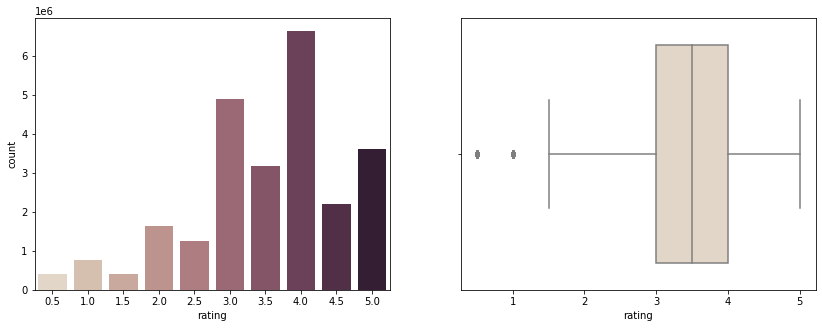

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
sns.countplot(x="rating", data=df, palette="ch:.25", ax=axes[0])
sns.boxplo# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Plot a countplot of the "rating" column on the first subplot
sns.countplot(x="rating", data=df, palette="ch:.25", ax=axes[0])

# Plot a boxplot of the "rating" column on the second subplot
sns.boxplot(x="rating", data=df, palette="ch:.25", ax=axes[1])t(x="rating", data=df, palette="ch:.25", ax=axes[1])

5. Data Sparsity

In [9]:
# Calculate the number of unique users in the DataFrame
n_users = df.userId.nunique()

# Calculate the number of unique items in the DataFrame
n_items = df.movieId.nunique()

# Calculate the total number of ratings in the DataFrame
n_ratings = len(df)

# Calculate the size of the rating matrix (all possible ratings)
rating_matrix_size = n_users * n_items

# Calculate the sparsity of the rating matrix
sparsity = 1 - n_ratings / rating_matrix_size

# Print the calculated values and sparsity percentage
print(f"Number of users: {n_users}")
print(f"Number of items: {n_items}")
print(f"Number of available ratings: {n_ratings}")
print(f"Number of all possible ratings: {rating_matrix_size}")
print("-" * 40)
print(f"SPARSITY: {sparsity * 100.0:.2f}%")

Number of users: 162541
Number of items: 59047
Number of available ratings: 25000095
Number of all possible ratings: 9597558427
----------------------------------------
SPARSITY: 99.74%


In [10]:
item_rate_count = df.groupby("movieId")["userId"].nunique().sort_values(ascending=False)
item_rate_count.head(10)

movieId
356     81491
318     81482
296     79672
593     74127
2571    72674
260     68717
480     64144
527     60411
110     59184
2959    58773
Name: userId, dtype: int64

In [11]:
item_rate_count.tail(10)

movieId
150914    1
151021    1
150918    1
150933    1
150941    1
150950    1
150962    1
151001    1
151011    1
136782    1
Name: userId, dtype: int64

[Text(0.5, 1.0, 'log-log plot'),
 Text(0.5, 0, '#ratings (log scale)'),
 Text(0, 0.5, '#frequency (log scale)')]

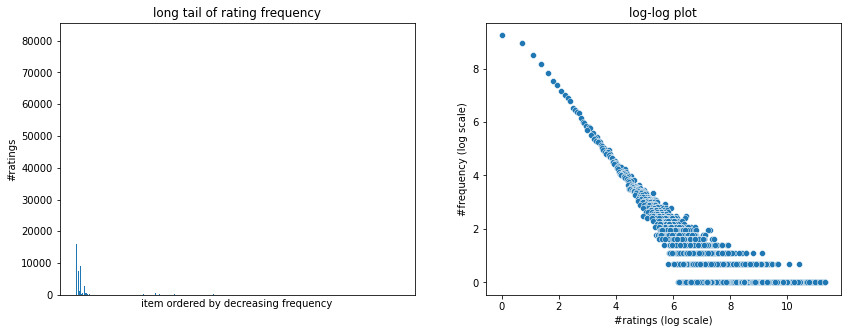

In [12]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Plot a bar plot on the first subplot
axes[0].bar(x=item_rate_count.index, height=item_rate_count.values, width=1.0, align="edge")

# Customize the first subplot
axes[0].set_xticks([])
axes[0].set(title="long tail of rating frequency", xlabel="item ordered by decreasing frequency", ylabel="#ratings")

# Compute the value counts of item_rate_count and plot a scatter plot on the second subplot
count = item_rate_count.value_counts()
sns.scatterplot(x=np.log(count.index), y=np.log(count.values), ax=axes[1])

# Customize the second subplot
axes[1].set(title="log-log plot", xlabel="#ratings (log scale)", ylabel="#frequency (log scale)")

In [13]:
   ratings_df['rating'].value_counts()


4.0    6639798
3.0    4896928
5.0    3612474
3.5    3177318
4.5    2200539
2.0    1640868
2.5    1262797
1.0     776815
1.5     399490
0.5     393068
Name: rating, dtype: int64

In [14]:
   ratings_df['rating'] = pd.to_numeric(ratings_df['rating'], errors='coerce')


In [15]:
import os
import sys
import textwrap
from collections import defaultdict

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import cornac
from cornac.utils import cache
from cornac.datasets import movielens
from cornac.eval_methods import RatioSplit
from cornac.models import UserKNN, ItemKNN

print(f"System version: {sys.version}")
print(f"Cornac version: {cornac.__version__}")

SEED = 42
VERBOSE = False

System version: 3.6.4 (v3.6.4:d48eceb, Dec 19 2017, 06:54:40) [MSC v.1900 64 bit (AMD64)]
Cornac version: 1.15.4


## 2.Neighborhood

1. Original Rating Matrix

In [16]:
# Create a sample DataFrame by randomly sampling 1000 rows from the `ratings_df` DataFrame
sample_df = ratings_df.sample(n=1000)

# Create a Cornac Dataset object from the sample DataFrame
dataset = cornac.data.Dataset.from_uir(sample_df.itertuples(index=False))

# Convert the Cornac Dataset object to a Pandas DataFrame
df = pd.DataFrame(dataset.matrix.A, index=[f"User {u + 1}" for u in np.arange(dataset.num_users)], columns=[f"Item {i + 1}" for i in np.arange(dataset.num_items)])

# Replace all 0 ratings in the DataFrame with NaN
df.replace(0, np.nan, inplace=True)

# Calculate the mean rating for each user and add it as a new column named "Mean Rating"
df["Mean Rating"] = df.mean(axis=1)

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 797,Item 798,Item 799,Item 800,Item 801,Item 802,Item 803,Item 804,Item 805,Mean Rating
User 1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
User 2,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
User 3,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5
User 4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
User 5,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
User 982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
User 983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0
User 984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3.0
User 985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0


2. Mean-Centered Rating Matrix

In [17]:
# Get the ratings from the DataFrame, excluding the "Mean Rating" column, as a NumPy array
ratings = df[df.columns.difference(["Mean Rating"])].values

# Get the mean ratings as a column vector using the "Mean Rating" column values
means = df["Mean Rating"].values[:, np.newaxis]

# Subtract the mean ratings from the ratings array
df[df.columns.difference(["Mean Rating"])] = (ratings - means)

# Drop the "Mean Rating" column from the DataFrame
df.drop(columns="Mean Rating")

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 796,Item 797,Item 798,Item 799,Item 800,Item 801,Item 802,Item 803,Item 804,Item 805
User 1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
User 2,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
User 3,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
User 4,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
User 5,NaN,NaN,NaN,NaN,-0.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
User 982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
User 983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
User 984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
User 985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


3. User-Based Methods

In [18]:
# User-Based Methods

# UserKNN with Cosine Similarity
# Create an instance of UserKNN with k=2 and similarity measure as cosine
# Fit the UserKNN model to the dataset
uknn_cosine = UserKNN(k=2, similarity="cosine", verbose=VERBOSE).fit(dataset)

# Print the cosine similarity between users 1 and 3
# Access the similarity matrix of the UserKNN model using the sim_mat attribute
# Extract the similarity score between users 1 and 3 using indexing (0-based indexing)
print(f"Cosine(1,3) = {uknn_cosine.sim_mat[0, 2]:.3f}")

# UserKNN with Pearson Similarity
# Create an instance of UserKNN with k=2 and similarity measure as pearson
# Fit the UserKNN model to the dataset
uknn_pearson = UserKNN(k=2, similarity="pearson", verbose=VERBOSE).fit(dataset)

# Print the pearson similarity between users 1 and 3
# Access the similarity matrix of the UserKNN model using the sim_mat attribute
# Extract the similarity score between users 1 and 3 using indexing (0-based indexing)
print(f"Pearson(1,3) = {uknn_pearson.sim_mat[0, 2]:.3f}")

Cosine(1,3) = 0.000
Pearson(1,3) = 0.000


In [19]:
print(f"R(3,1) = {uknn_pearson.score(user_idx=2, item_idx=0):.2f}")
print(f"R(3,6) = {uknn_pearson.score(user_idx=2, item_idx=5):.2f}")

R(3,1) = 3.50
R(3,6) = 3.50


Let's Try It on a Real Dataset

In [20]:
# UserKNN methods
K = 50  # number of nearest neighbors

# UserKNN with Cosine Similarity, without mean centering
uknn_cosine = UserKNN(
  k=K, similarity="cosine", name="UserKNN-Cosine", verbose=VERBOSE
)

# UserKNN with Cosine Similarity, with mean centering
uknn_cosine_mc = UserKNN(
  k=K, similarity="cosine", mean_centered=True, name="UserKNN-Cosine-MC", verbose=VERBOSE
)

# UserKNN with Pearson Similarity, without mean centering
uknn_pearson = UserKNN(
  k=K, similarity="pearson", name="UserKNN-Pearson", verbose=VERBOSE
)

# UserKNN with Pearson Similarity, with mean centering
uknn_pearson_mc = UserKNN(
  k=K, similarity="pearson", mean_centered=True, name="UserKNN-Pearson-MC", verbose=VERBOSE
)

# Load the dataset using movielens variant "100K"
feedback = movielens.load_feedback(variant="100K")

# Split the dataset into train and test sets using a ratio-based split
# Specify the test set size as 0.1 (10%)
# Set a seed for reproducibility
ratio_split = RatioSplit(feedback, test_size=0.1, seed=SEED, verbose=VERBOSE)

# Run an experiment to evaluate the models
cornac.Experiment(
  eval_method=ratio_split,
  models=[uknn_cosine, uknn_cosine_mc, uknn_pearson, uknn_pearson_mc],
  metrics=[cornac.metrics.RMSE()],
).run()


TEST:
...
                   |   RMSE | Train (s) | Test (s)
------------------ + ------ + --------- + --------
UserKNN-Cosine     | 0.9099 |    0.1531 |   1.6793
UserKNN-Cosine-MC  | 0.8947 |    0.1546 |   1.6951
UserKNN-Pearson    | 0.8947 |    0.1332 |   1.9404
UserKNN-Pearson-MC | 0.8947 |    0.1799 |   1.8828



4. Item-Based Methods

In [21]:
# Item-Based Methods

# ItemKNN with Adjusted Cosine Similarity, with mean centering
# Create an instance of ItemKNN with k=2, similarity measure as cosine, and mean centering enabled
# Fit the ItemKNN model to the dataset
iknn_adj = ItemKNN(k=2, similarity="cosine", mean_centered=True, verbose=VERBOSE).fit(dataset)

# Print the adjusted cosine similarity between items 1 and 3
# Access the similarity matrix of the ItemKNN model using the sim_mat attribute
# Extract the similarity score between items 1 and 3 using indexing (0-based indexing)
print(f"AdjustedCosine(1,3) = {iknn_adj.sim_mat[0, 2]:.3f}")

AdjustedCosine(1,3) = 0.000


In [22]:
print(f"R(3,1) = {iknn_adj.score(user_idx=2, item_idx=0):.1f}")
print(f"R(3,6) = {iknn_adj.score(user_idx=2, item_idx=5):.1f}")

R(3,1) = 3.5
R(3,6) = 3.5


Let's Try it on a Real Dataset

In [23]:
# ItemKNN methods
K = 50  # number of nearest neighbors
iknn_cosine = ItemKNN(
  k=K, similarity="cosine", name="ItemKNN-Cosine", verbose=VERBOSE
)
iknn_pearson = ItemKNN(
  k=K, similarity="pearson", name="ItemKNN-Pearson", verbose=VERBOSE
)
iknn_pearson_mc = ItemKNN(
  k=K, similarity="pearson", mean_centered=True, name="ItemKNN-Pearson-MC", verbose=VERBOSE
)
iknn_adjusted = ItemKNN(
  k=K, similarity="cosine", mean_centered=True, name="ItemKNN-AdjustedCosine", verbose=VERBOSE
)

feedback = movielens.load_feedback(variant="100K")
ratio_split = RatioSplit(feedback, test_size=0.1, seed=SEED, verbose=VERBOSE)
cornac.Experiment(
  eval_method=ratio_split, 
  models=[iknn_cosine, iknn_pearson, iknn_pearson_mc, iknn_adjusted],
  metrics=[cornac.metrics.RMSE()],
).run()


TEST:
...
                       |   RMSE | Train (s) | Test (s)
---------------------- + ------ + --------- + --------
ItemKNN-Cosine         | 0.9689 |    0.3049 |   1.8291
ItemKNN-Pearson        | 0.9624 |    0.3222 |   2.0256
ItemKNN-Pearson-MC     | 0.9572 |    0.3092 |   1.8365
ItemKNN-AdjustedCosine | 0.9098 |    0.2792 |   1.8434



5. Similarity Reweighting

In [24]:
# Similarity Reweighting

# UserKNN methods
K = 50  # number of nearest neighbors

# UserKNN base model with Pearson similarity (no reweighting)
uknn_base = UserKNN(
  k=K, similarity="pearson", name="UserKNN-Base", verbose=VERBOSE
)

# UserKNN model with Pearson similarity and similarity amplification (amplify=0.5)
uknn_amp1 = UserKNN(
  k=K, similarity="pearson", amplify=0.5, name="UserKNN-Amp0.5", verbose=VERBOSE
)

# UserKNN model with Pearson similarity and similarity amplification (amplify=3.0)
uknn_amp2 = UserKNN(
  k=K, similarity="pearson", amplify=3.0, name="UserKNN-Amp3.0", verbose=VERBOSE
)

# UserKNN model with Pearson similarity and IDF weighting
uknn_idf = UserKNN(
  k=K, similarity="pearson", weighting="idf", name="UserKNN-IDF", verbose=VERBOSE
)

# UserKNN model with Pearson similarity and BM25 weighting
uknn_bm25 = UserKNN(
  k=K, similarity="pearson", weighting="bm25", name="UserKNN-BM25", verbose=VERBOSE
)

# Load the dataset using movielens variant "100K"
feedback = movielens.load_feedback(variant="100K")

# Split the dataset into train and test sets using a ratio-based split
# Specify the test set size as 0.1 (10%)
# Set a seed for reproducibility
ratio_split = RatioSplit(feedback, test_size=0.1, seed=SEED, verbose=VERBOSE)

# Run an experiment to evaluate the models
cornac.Experiment(
  eval_method=ratio_split,
  models=[uknn_base, uknn_amp1, uknn_amp2, uknn_idf, uknn_bm25],
  metrics=[cornac.metrics.RMSE()],
).run()


TEST:
...
               |   RMSE | Train (s) | Test (s)
-------------- + ------ + --------- + --------
UserKNN-Base   | 0.8947 |    0.1669 |   1.7703
UserKNN-Amp0.5 | 0.8934 |    1.0488 |   1.9690
UserKNN-Amp3.0 | 0.9135 |    0.8978 |   1.9153
UserKNN-IDF    | 0.8956 |    0.1705 |   1.8257
UserKNN-BM25   | 0.8955 |    0.1611 |   2.0016




This code snippet demonstrates the use of similarity reweighting techniques with the UserKNN collaborative filtering method using the Cornac library.

1. UserKNN Setup:
- Set the parameter `K` to 50, specifying the number of nearest neighbors to consider for the UserKNN models.
- Create five instances of the UserKNN class with different configurations:
  - `uknn_base`: UserKNN model with Pearson similarity and no reweighting. This serves as the base model.
  - `uknn_amp1`: UserKNN model with Pearson similarity and similarity amplification (amplify=0.5).
  - `uknn_amp2`: UserKNN model with Pearson similarity and similarity amplification (amplify=3.0).
  - `uknn_idf`: UserKNN model with Pearson similarity and IDF (Inverse Document Frequency) weighting.
  - `uknn_bm25`: UserKNN model with Pearson similarity and BM25 (Best Match 25) weighting.

2. Load Data:
- Load the "100K" variant of the MovieLens dataset using `movielens.load_feedback(variant="100K")`. The resulting `feedback` object represents the user-item ratings.

3. Split Data:
- Create a `RatioSplit` object to split the dataset into train and test sets using a ratio-based split. Here, the test set size is set to 0.1 or 10% of the dataset. The `seed` parameter is used to set a random seed for reproducibility. `verbose=VERBOSE` controls the verbosity level of the output during the split.

4. Run the Experiment:
- Use the `cornac.Experiment` class to set up and run the experiment.
- Pass the `ratio_split` object as the evaluation method for the experiment.
- Specify the models to evaluate by providing a list of the UserKNN models created earlier.
- Specify the evaluation metric as `cornac.metrics.RMSE()`, which calculates the root mean square error.

6. Interpreting Recommendations

In [25]:
# Download some information of MovieLens 100K dataset
user_df = pd.read_csv(
  cache("http://files.grouplens.org/datasets/movielens/ml-100k/u.user"), 
  sep="|", names=["UserID", "Age", "Gender", "Occupation", "Zip Code"]
).set_index("UserID")

item_df = pd.read_csv(
  cache("http://files.grouplens.org/datasets/movielens/ml-100k/u.item"), 
  sep="|", encoding="ISO-8859-1",
  names=["ItemID", "Title", "Release Date", "Video Release Date", "IMDb URL", 
         "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", 
         "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", 
         "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]
).set_index("ItemID").drop(columns=["Video Release Date", "IMDb URL", "unknown"])
     

UserKNN (Pearson)

In [26]:
rating_mat = uknn_pearson.train_set.matrix
user_id2idx = uknn_pearson.train_set.uid_map
user_idx2id = list(uknn_pearson.train_set.user_ids)
item_id2idx = uknn_pearson.train_set.iid_map
item_idx2id = list(uknn_pearson.train_set.item_ids)

TOPK = 5
UID = 1
UIDX = uknn_pearson.train_set.uid_map[str(UID)]

print(f"UserID = {UID}")
print("-" * 25)
print(user_df.loc[UID])

rating_arr = rating_mat[UIDX].A.ravel()
top_rated_items = np.argsort(rating_arr)[-TOPK:]
print(f"\nTOP {TOPK} RATED ITEMS BY USER {UID}:")
item_df.loc[[int(item_idx2id[i]) for i in top_rated_items]]

UserID = 1
-------------------------
Age                   24
Gender                 M
Occupation    technician
Zip Code           85711
Name: 1, dtype: object

TOP 5 RATED ITEMS BY USER 1:


,Title,Release Date,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
ItemID,,,,,,,,,,,,,,,,,,,,
96,Terminator 2: Judgment Day (1991),01-Jan-1991,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
48,Hoop Dreams (1994),01-Jan-1994,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
127,"Godfather, The (1972)",01-Jan-1972,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
150,Swingers (1996),18-Oct-1996,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
16,French Twist (Gazon maudit) (1995),01-Jan-1995,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [27]:
recommendations, scores = iknn_adjusted.rank(UIDX)
print(f"\nTOP {TOPK} RECOMMENDATIONS FOR USER {UID}:")
print("Scores:", scores[recommendations[:TOPK]])
item_df.loc[[int(item_idx2id[i]) for i in recommendations[:TOPK]]]


TOP 5 RECOMMENDATIONS FOR USER 1:
Scores: [4.65533227 4.64790324 4.64234397 4.61749142 4.61334104]


,Title,Release Date,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
ItemID,,,,,,,,,,,,,,,,,,,,
115,"Haunted World of Edward D. Wood Jr., The (1995)",26-Apr-1996,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
113,"Horseman on the Roof, The (Hussard sur le toit...",19-Apr-1996,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
181,Return of the Jedi (1983),14-Mar-1997,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
165,Jean de Florette (1986),01-Jan-1986,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
198,Nikita (La Femme Nikita) (1990),01-Jan-1990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [28]:

df = defaultdict(list)
score_arr = iknn_adjusted.ui_mat[UIDX].A.ravel()
rated_items = np.nonzero(rating_mat[UIDX])[1]
for rec in recommendations[:TOPK]:
  sim_arr = iknn_adjusted.sim_mat[rec].A.ravel()
  nearest_neighbor = rated_items[np.argsort(sim_arr[rated_items])[-1]]
  sim = sim_arr[nearest_neighbor]
  score = score_arr[nearest_neighbor]
  df["Recommendation"].append(item_df.loc[[int(item_idx2id[rec])]]["Title"].values[0])
  df["Item NN"].append(nearest_neighbor)
  df["Similarity"].append(sim)
  df["Score of the NN"].append(score)
  df["Contribution"].append((score * sim) / np.abs(sim))
rec_df = pd.DataFrame.from_dict(df)
rec_df

,Recommendation,Item NN,Similarity,Score of the NN,Contribution
0,"Haunted World of Edward D. Wood Jr., The (1995)",1565,1.0,0.410256,0.410256
1,"Horseman on the Roof, The (Hussard sur le toit...",100,1.0,1.410256,1.410256
2,Return of the Jedi (1983),305,1.0,1.410256,1.410256
3,Jean de Florette (1986),1278,1.0,0.410256,0.410256
4,Nikita (La Femme Nikita) (1990),364,1.0,1.410256,1.410256


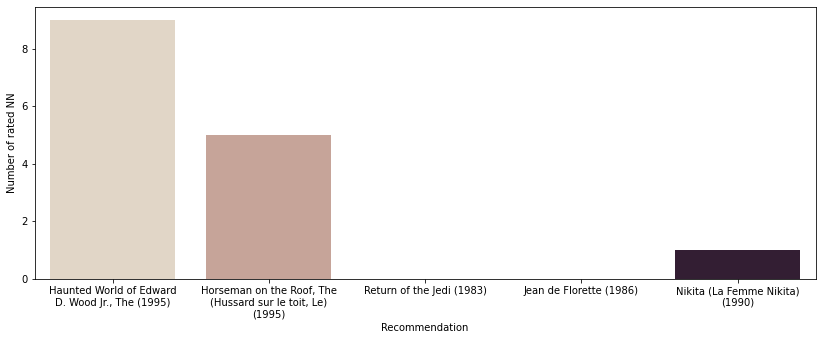

In [29]:
rated_items = np.nonzero(rating_mat[UIDX])[1]
n_nearest_neighbors = []
for rec in recommendations[:TOPK]:
  nearest_neighbors = np.argsort(iknn_adjusted.sim_mat[rec].A.ravel())[-K:]
  n_nearest_neighbors.append(len(np.intersect1d(nearest_neighbors, rated_items)))
rec_df["Number of rated NN"] = n_nearest_neighbors

fig, ax = plt.subplots(figsize=(14, 5))
sns.barplot(x="Recommendation", y="Number of rated NN", data=rec_df, palette="ch:.25", ax=ax);
ax.set_xticklabels(textwrap.fill(x.get_text(), 25) for x in ax.get_xticklabels());

## 3. Matrix Factorization

In [30]:
import os
import sys
import itertools

import scipy.sparse as sp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import cornac
from cornac.utils import cache
from cornac.eval_methods import RatioSplit
from cornac.models import MF, NMF, BaselineOnly

print(f"System version: {sys.version}")
print(f"Cornac version: {cornac.__version__}")

SEED = 42
VERBOSE = False

System version: 3.6.4 (v3.6.4:d48eceb, Dec 19 2017, 06:54:40) [MSC v.1900 64 bit (AMD64)]
Cornac version: 1.15.4


In [31]:
sample_df = pd.read_csv(
  cache("https://static.preferred.ai/tutorials/recommender-systems/sample_data.csv"), 
  sep=",", names=["UserID", "ItemID", "Rating"]
)
dataset = cornac.data.Dataset.from_uir(sample_df.itertuples(index=False))
R = dataset.matrix.A
R_mask = (R > 0).astype(float)
pd.DataFrame(
  data=R,
  index=[f"User {u + 1}" for u in np.arange(dataset.num_users)],
  columns=[f"Item {i + 1}" for i in np.arange(dataset.num_items)]
).replace(0, np.nan)

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6
User 1,7.0,6.0,7.0,4.0,5.0,4.0
User 2,6.0,7.0,NaN,4.0,3.0,4.0
User 3,NaN,3.0,3.0,1.0,1.0,NaN
User 4,1.0,2.0,2.0,3.0,3.0,4.0
User 5,1.0,NaN,1.0,2.0,3.0,3.0


In [32]:
U, s, Vt = np.linalg.svd(R, full_matrices=True)
print("Singular values: ", s.round(3))
Sigma = np.zeros((R.shape[0], R.shape[1]))
Sigma[:R.shape[0], :R.shape[0]] = np.diag(s)

N = 1
Sigma = Sigma[:, :N]
Vt = Vt[:N, :]
recon_R = U.dot(Sigma.dot(Vt))

rmse = np.sqrt((((R - recon_R) ** 2) * R_mask).mean())
print(f"\nRMSE = {rmse:.3f}")
print("Reconstructed matrix:")
pd.DataFrame(recon_R.round(2),
             index=[f"User {u + 1}" for u in np.arange(dataset.num_users)],
             columns=[f"Item {i + 1}" for i in np.arange(dataset.num_items)])

Singular values:  [18.703  5.187  4.537  2.526  0.561]

RMSE = 1.065
Reconstructed matrix:


,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6
User 1,6.44,6.78,4.63,4.79,5.06,5.04
User 2,4.95,5.21,3.56,3.69,3.89,3.87
User 3,1.55,1.63,1.12,1.16,1.22,1.21
User 4,2.78,2.93,2.00,2.07,2.18,2.18
User 5,1.79,1.89,1.29,1.34,1.41,1.40


1. Matrix Factorization (MF)

In [35]:
mf = MF(
  k=1, max_iter=100, learning_rate=0.01, lambda_reg=0.0, use_bias=False, verbose=VERBOSE
).fit(dataset)
print("User factors:\n", mf.u_factors)
print("Item factors:\n", mf.i_factors)

recon_R = np.empty(dataset.matrix.shape)
for u, i in itertools.product(range(recon_R.shape[0]), range(recon_R.shape[1])):
  recon_R[u, i] = mf.score(u, i)

rmse = np.sqrt((((R - recon_R) ** 2) * R_mask).mean())
print(f"\nRMSE = {rmse:.3f}")
print("Reconstructed matrix:")
pd.DataFrame(recon_R.round(2),
             index=[f"User {u + 1}" for u in np.arange(dataset.num_users)],
             columns=[f"Item {i + 1}" for i in np.arange(dataset.num_items)])

User factors:
 [[-2.9957786]
 [-2.7526639]
 [-1.1497971]
 [-1.2485691]
 [-1.038218 ]]
Item factors:
 [[-2.0673497]
 [-2.231073 ]
 [-2.1589453]
 [-1.4565188]
 [-1.5209622]
 [-1.612744 ]]

RMSE = 0.882
Reconstructed matrix:


,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6
User 1,6.19,6.68,6.47,4.36,4.56,4.83
User 2,5.69,6.14,5.94,4.01,4.19,4.44
User 3,2.38,2.57,2.48,1.67,1.75,1.85
User 4,2.58,2.79,2.70,1.82,1.90,2.01
User 5,2.15,2.32,2.24,1.51,1.58,1.67


Let's Try MF on a Real Dataset

In [36]:
K = 100
mf = MF(k=K, max_iter=20, learning_rate=0.01, lambda_reg=0.0, use_bias=False,
        verbose=VERBOSE, seed=SEED, name=f"MF(K={K})")
  
data = movielens.load_feedback(variant="100K")
rs = RatioSplit(data, test_size=0.2, seed=SEED, verbose=VERBOSE)
rmse = cornac.metrics.RMSE()
cornac.Experiment(eval_method=rs, models=[mf], metrics=[rmse]).run()


TEST:
...
          |   RMSE | Train (s) | Test (s)
--------- + ------ + --------- + --------
MF(K=100) | 0.8957 |    0.4961 |   0.4154



2. Regularization

In [37]:
K = 100
lbd = 0.01
mf = MF(k=K, max_iter=20, learning_rate=0.01, lambda_reg=lbd, use_bias=False,
        verbose=VERBOSE, seed=SEED, name=f"MF(K={K},lambda={lbd:.4f})")

data = movielens.load_feedback(variant="100K")
rs = RatioSplit(data, test_size=0.2, seed=SEED, verbose=VERBOSE)
rmse = cornac.metrics.RMSE()
cornac.Experiment(eval_method=rs, models=[mf], metrics=[rmse]).run()


TEST:
...
                        |   RMSE | Train (s) | Test (s)
----------------------- + ------ + --------- + --------
MF(K=100,lambda=0.0100) | 0.8943 |    0.6085 |   0.5893



3. Effect of Bias

In [38]:
K = 100
models = [
  BaselineOnly(max_iter=20, learning_rate=0.01, lambda_reg=0.01, verbose=VERBOSE),
  MF(k=K, max_iter=20, learning_rate=0.01, lambda_reg=0.01, use_bias=False, 
     verbose=VERBOSE, seed=SEED, name=f"MF(K={K})"),
  MF(k=K, max_iter=20, learning_rate=0.01, lambda_reg=0.01, use_bias=True, 
     verbose=VERBOSE, seed=SEED, name=f"MF(K={K},bias)"),
]

data = movielens.load_feedback(variant="100K")
rs = RatioSplit(data, test_size=0.2, seed=SEED, verbose=VERBOSE)
rmse = cornac.metrics.RMSE()
cornac.Experiment(eval_method=rs, models=models, metrics=[rmse]).run()


TEST:
...
               |   RMSE | Train (s) | Test (s)
-------------- + ------ + --------- + --------
BaselineOnly   | 0.9108 |    0.0147 |   0.3526
MF(K=100)      | 0.8943 |    0.6082 |   0.5320
MF(K=100,bias) | 0.8878 |    0.5428 |   0.4209



4. Non-Negative Matrix Factorization (NMF)

In [39]:
nmf = NMF(
  k=1, max_iter=100, learning_rate=0.01, lambda_reg=0.0, verbose=VERBOSE
).fit(dataset)
print("User factors:\n", nmf.u_factors)
print("Item factors:\n", nmf.i_factors)

recon_R = np.empty(dataset.matrix.shape)
for u, i in itertools.product(range(recon_R.shape[0]), range(recon_R.shape[1])):
  recon_R[u, i] = nmf.score(u, i)

rmse = np.sqrt((((R - recon_R) ** 2) * R_mask).mean())
print(f"\nRMSE = {rmse:.3f}")
print("Reconstructed matrix:")
pd.DataFrame(recon_R.round(2),
             index=[f"User {u + 1}" for u in np.arange(dataset.num_users)],
             columns=[f"Item {i + 1}" for i in np.arange(dataset.num_items)])

User factors:
 [[2.7347803]
 [2.5037546]
 [1.0476946]
 [1.1425741]
 [0.9433611]]
Item factors:
 [[2.1196423]
 [2.2722871]
 [2.1941228]
 [1.4909296]
 [1.5550097]
 [1.6578312]]

RMSE = 0.916
Reconstructed matrix:


,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6
User 1,5.80,6.21,6.00,4.08,4.25,4.53
User 2,5.31,5.69,5.49,3.73,3.89,4.15
User 3,2.22,2.38,2.30,1.56,1.63,1.74
User 4,2.42,2.60,2.51,1.70,1.78,1.89
User 5,2.00,2.14,2.07,1.41,1.47,1.56


5. NMF on MovieLens 100K

In [40]:
K = 10
nmf = NMF(k=K, max_iter=200, learning_rate=0.01, lambda_reg=0.01, use_bias=False,
          verbose=VERBOSE, seed=SEED, name=f"NMF(K={K})")
          
data = movielens.load_feedback(variant="100K")
rs = RatioSplit(data, test_size=0.2, seed=SEED, verbose=VERBOSE)
rmse = cornac.metrics.RMSE()
cornac.Experiment(eval_method=rs, models=[nmf], metrics=[rmse]).run()


TEST:
...
          |   RMSE | Train (s) | Test (s)
--------- + ------ + --------- + --------
NMF(K=10) | 1.0196 |    1.1266 |   0.3629



6. Interpreting Latent Factors

In [41]:
# Download some information of MovieLens 100K dataset
item_df = pd.read_csv(
  cache("http://files.grouplens.org/datasets/movielens/ml-100k/u.item"), 
  sep="|", encoding="ISO-8859-1",
  names=["ItemID", "Title", "Release Date", "Video Release Date", "IMDb URL", 
         "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", 
         "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", 
         "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]
).set_index("ItemID").drop(columns=["Video Release Date", "IMDb URL", "unknown"])

In [42]:
K = 10
mf = MF(k=K, max_iter=20, learning_rate=0.01, lambda_reg=0.01, use_bias=False, 
        verbose=VERBOSE, seed=SEED, name=f"MF(K={K})")
nmf = NMF(k=K, max_iter=200, learning_rate=0.01, lambda_reg=0.01, use_bias=False, 
          verbose=VERBOSE, seed=SEED, name=f"NMF(K={K})")
  
data = movielens.load_feedback(variant="100K")
rs = RatioSplit(data, test_size=0.2, seed=SEED, verbose=VERBOSE)
rmse = cornac.metrics.RMSE()
cornac.Experiment(eval_method=rs, models=[mf, nmf], metrics=[rmse]).run()


TEST:
...
          |   RMSE | Train (s) | Test (s)
--------- + ------ + --------- + --------
MF(K=10)  | 0.9027 |    0.0554 |   0.3866
NMF(K=10) | 1.0196 |    1.1267 |   0.4079



MF

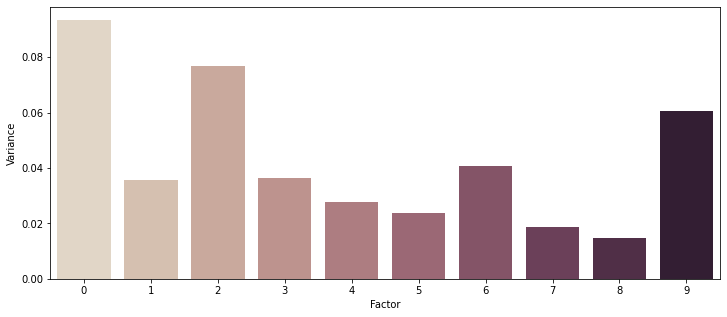

In [43]:
var_df = pd.DataFrame({"Factor": np.arange(K), "Variance": np.var(mf.i_factors, axis=0)})
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x="Factor", y="Variance", data=var_df, palette="ch:.25", ax=ax);

NameError: name 'adjust_text' is not defined

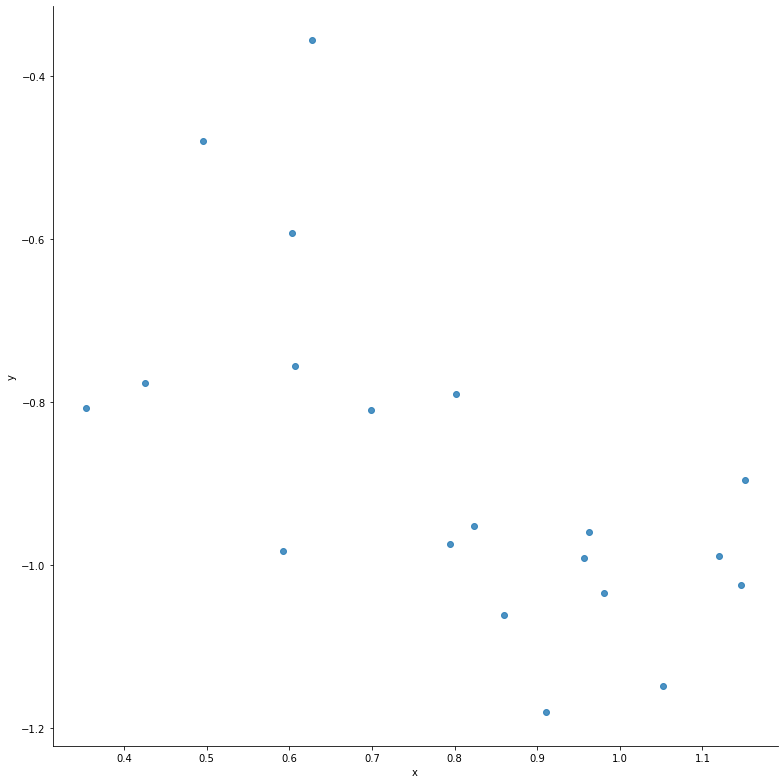

In [47]:
TOP2F = (0, 2)
SAMPLE_SIZE = 20

rng = np.random.RandomState(SEED)
sample_inds = rng.choice(np.arange(mf.i_factors.shape[0]), size=SAMPLE_SIZE, replace=False)
sample_df = pd.DataFrame(data=mf.i_factors[sample_inds][:, TOP2F], columns=["x", "y"])

sns.lmplot(x="x", y="y", data=sample_df, height=11.0, fit_reg=False)
item_idx2id = list(mf.train_set.item_ids)
titles = item_df.loc[[int(item_idx2id[i]) for i in sample_inds]]["Title"].values
adjust_text(
  [plt.text(*sample_df.loc[i].values, titles[i], size=10) for i in range(len(titles))]
);

NMF

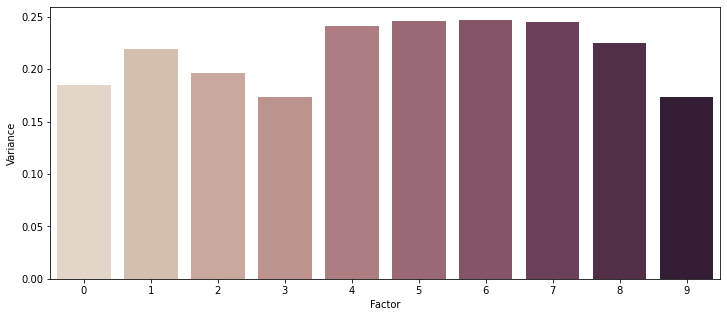

In [45]:
var_df = pd.DataFrame({"Factor": np.arange(K), "Variance": np.var(nmf.i_factors, axis=0)})
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x="Factor", y="Variance", data=var_df, palette="ch:.25", ax=ax);

NameError: name 'adjust_text' is not defined

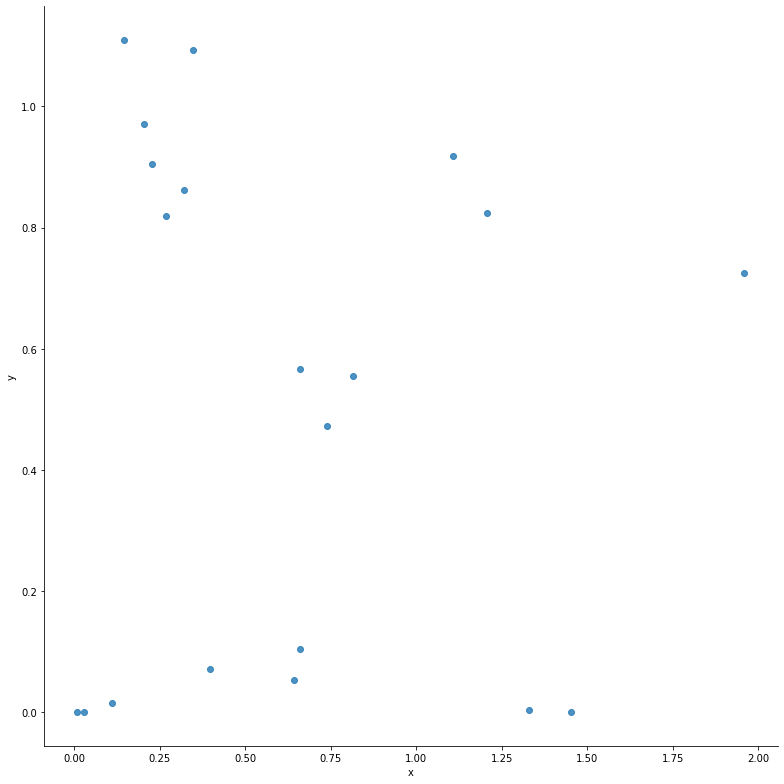

In [46]:
TOP2F = (5, 6)
SAMPLE_SIZE = 20

rng = np.random.RandomState(SEED)
sample_inds = rng.choice(np.arange(nmf.i_factors.shape[0]), size=SAMPLE_SIZE, replace=False)
sample_df = pd.DataFrame(data=nmf.i_factors[sample_inds][:, TOP2F], columns=["x", "y"])

sns.lmplot(x="x", y="y", data=sample_df, height=11.0, fit_reg=False)
item_idx2id = list(nmf.train_set.item_ids)
titles = item_df.loc[[int(item_idx2id[i]) for i in sample_inds]]["Title"].values
adjust_text(
  [plt.text(*sample_df.loc[i].values, titles[i], size=10) for i in range(len(titles))]
);

In [48]:
item_idx2id = list(nmf.train_set.item_ids)
top_items = {}
for k in range(K):
  top_inds = np.argsort(nmf.i_factors[:, k])[-5:][::-1]
  top_items[f"Factor {k}"] = item_df.loc[[int(item_idx2id[i]) for i in top_inds]]["Title"].values
pd.DataFrame(top_items)

,Factor 0,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7,Factor 8,Factor 9
0,Carpool (1996),Best Men (1997),Bhaji on the Beach (1993),"Garden of Finzi-Contini, The (Giardino dei Fin...",Tough and Deadly (1995),"Boys, Les (1997)",Ruby in Paradise (1993),Deep Rising (1998),City of Industry (1997),Gumby: The Movie (1995)
1,"Good Man in Africa, A (1994)",Paradise Lost: The Child Murders at Robin Hood...,Panther (1995),Kissed (1996),8 Heads in a Duffel Bag (1997),Nénette et Boni (1996),Mina Tannenbaum (1994),Captives (1994),Romper Stomper (1992),Turbulence (1997)
2,"Neon Bible, The (1995)",Angel Baby (1995),Nina Takes a Lover (1994),"Ice Storm, The (1997)",Selena (1997),Ghost in the Shell (Kokaku kidotai) (1995),Harlem (1993),"Baby-Sitters Club, The (1995)",Tetsuo II: Body Hammer (1992),"Man in the Iron Mask, The (1998)"
3,C'est arrivé près de chez vous (1992),Cemetery Man (Dellamorte Dellamore) (1994),Cats Don't Dance (1997),"Low Down Dirty Shame, A (1994)",Love Jones (1997),Grace of My Heart (1996),"Secret Agent, The (1996)",Prisoner of the Mountains (Kavkazsky Plennik) ...,"Boys, Les (1997)",Radioland Murders (1994)
4,Miami Rhapsody (1995),Underground (1995),Until the End of the World (Bis ans Ende der W...,Dunston Checks In (1996),"Little Princess, The (1939)",Stalingrad (1993),"White Balloon, The (1995)",Guilty as Sin (1993),To Live (Huozhe) (1994),Infinity (1996)


In [49]:
item_idx2id = list(nmf.train_set.item_ids)
top_genres = {}
for k in range(K):
  top_inds = np.argsort(nmf.i_factors[:, k])[-100:]
  top_items = item_df.loc[[int(item_idx2id[i]) for i in top_inds]]
  top_genres[f"Factor {k}"] = top_items.drop(columns=["Title", "Release Date"]).sum(axis=0)
pd.DataFrame(top_genres)

,Factor 0,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7,Factor 8,Factor 9
Action,18,11,12,17,12,7,4,5,20,15
Adventure,12,4,11,3,5,3,6,2,13,11
Animation,0,1,1,5,3,2,5,0,0,3
Children's,5,3,6,5,5,5,2,2,8,20
Comedy,27,29,31,36,22,32,33,28,24,38
Crime,7,9,5,9,4,3,6,4,9,3
Documentary,3,10,1,3,1,6,4,3,2,3
Drama,39,42,45,43,49,50,55,60,45,30
Fantasy,0,1,1,0,1,1,0,0,1,2
Film-Noir,1,0,0,3,2,1,0,1,0,1


## 4.Implicit Feedback

1. Setup

In [53]:
import os
import sys
from collections import defaultdict

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
%matplotlib inline

import cornac
from cornac.utils import cache
from cornac.datasets import movielens
from cornac.eval_methods import RatioSplit
from cornac.models import MF, BPR, WMF

import tensorflow as tf

print(f"System version: {sys.version}")
print(f"Cornac version: {cornac.__version__}")
print(f"Tensorflow version: {tf.__version__}")

SEED = 42
VERBOSE = False

SyntaxError: future feature annotations is not defined (__init__.py, line 1)

2. Weighted Matrix Factorization (WMF)

In [52]:
from cornac.models import WMF

K = 50
wmf = WMF(k=K, max_iter=100, a=1.0, b=0.01, learning_rate=0.001, lambda_u=0.01, lambda_v=0.01,
          verbose=VERBOSE, seed=SEED, name=f"WMF(K={K})")
mf = MF(k=K, max_iter=20, learning_rate=0.01, lambda_reg=0.01, 
        verbose=VERBOSE, seed=SEED, name=f"MF(K={K})")

eval_metrics = [
  cornac.metrics.RMSE(), 
  cornac.metrics.AUC(),
  cornac.metrics.Precision(k=10),
  cornac.metrics.Recall(k=10),
  cornac.metrics.FMeasure(k=10),
  cornac.metrics.NDCG(k=[10, 20, 30]),
  cornac.metrics.MRR(),
  cornac.metrics.MAP()
]

data = movielens.load_feedback(variant="100K")
rs = RatioSplit(data, test_size=0.2, seed=SEED, verbose=VERBOSE)

cornac.Experiment(eval_method=rs, models=[wmf, mf], metrics=eval_metrics).run()

C:\Users\ABIR°S ELITEBOOK\AppData\Roaming\Python\Python36\site-packages\requests\__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.18) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)



TEST:
...
          |   RMSE |    AUC |  F1@10 |    MAP |    MRR | NDCG@10 | NDCG@20 | NDCG@30 | Precision@10 | Recall@10 | Train (s) | Test (s)
--------- + ------ + ------ + ------ + ------ + ------ + ------- + ------- + ------- + ------------ + --------- + --------- + --------
WMF(K=50) | 1.1012 | 0.8980 | 0.0734 | 0.0956 | 0.2387 |  0.1068 |  0.1293 |  0.1506 |       0.0968 |    0.0800 |   15.7288 |   3.0481
MF(K=50)  | 0.8909 | 0.6573 | 0.0290 | 0.0402 | 0.1453 |  0.0539 |  0.0565 |  0.0626 |       0.0524 |    0.0241 |    0.3863 |   5.2099



3. Bayesian Personalized Ranking (BPR)

In [55]:
from cornac.models import BPR
K = 50
bpr = BPR(k=K, max_iter=200, learning_rate=0.01, lambda_reg=0.001, 
          verbose=VERBOSE, seed=SEED, name=f"BPR(K={K})")
wmf = WMF(k=K, max_iter=100, a=1.0, b=0.01, learning_rate=0.001, lambda_u=0.01, lambda_v=0.01,
          verbose=VERBOSE, seed=SEED, name=f"WMF(K={K})")

rs = RatioSplit(data, test_size=0.2, seed=SEED, verbose=VERBOSE)
cornac.Experiment(eval_method=rs, models=[bpr, wmf], metrics=eval_metrics).run()


TEST:
...
          |   RMSE |    AUC |  F1@10 |    MAP |    MRR | NDCG@10 | NDCG@20 | NDCG@30 | Precision@10 | Recall@10 | Train (s) | Test (s)
--------- + ------ + ------ + ------ + ------ + ------ + ------- + ------- + ------- + ------------ + --------- + --------- + --------
BPR(K=50) | 1.5631 | 0.9356 | 0.0859 | 0.1146 | 0.2337 |  0.1096 |  0.1393 |  0.1662 |       0.0938 |    0.1000 |    5.6479 |   4.1345
WMF(K=50) | 1.1012 | 0.8980 | 0.0734 | 0.0956 | 0.2387 |  0.1068 |  0.1293 |  0.1506 |       0.0968 |    0.0800 |    7.0029 |   2.4751



4. Interpreting Latent Factors

In [56]:
# Download some information of MovieLens 100K dataset
item_df = pd.read_csv(
  cache("http://files.grouplens.org/datasets/movielens/ml-100k/u.item"), 
  sep="|", encoding="ISO-8859-1",
  names=["ItemID", "Title", "Release Date", "Video Release Date", "IMDb URL", 
         "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", 
         "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", 
         "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]
).set_index("ItemID").drop(columns=["Video Release Date", "IMDb URL", "unknown"])

5. WMF Latent Factors

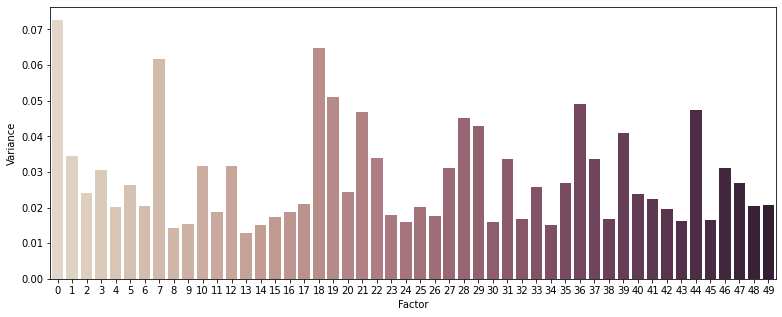

In [57]:
var_df = pd.DataFrame({"Factor": np.arange(K), "Variance": np.var(wmf.V, axis=0)})
fig, ax = plt.subplots(figsize=(13, 5))
sns.barplot(x="Factor", y="Variance", data=var_df, palette="ch:.25", ax=ax);

NameError: name 'adjust_text' is not defined

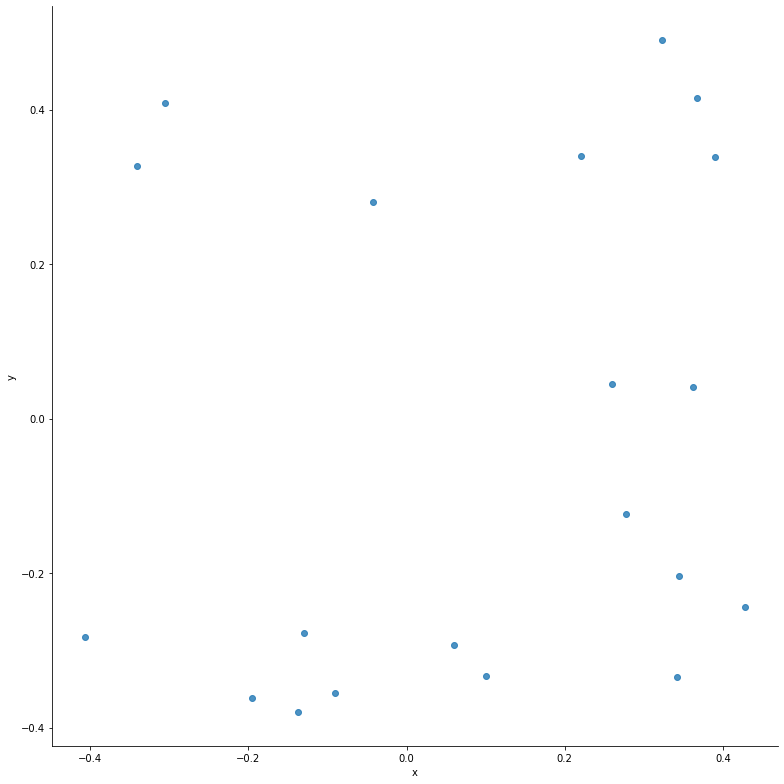

In [58]:
TOP2F = (0, 18)
SAMPLE_SIZE = 20

rng = np.random.RandomState(SEED)
sample_inds = rng.choice(np.arange(wmf.V.shape[0]), size=SAMPLE_SIZE, replace=False)
sample_df = pd.DataFrame(data=wmf.V[sample_inds][:, TOP2F], columns=["x", "y"])

sns.lmplot(x="x", y="y", data=sample_df, height=11.0, fit_reg=False)
item_idx2id = list(wmf.train_set.item_ids)
titles = item_df.loc[[int(item_idx2id[i]) for i in sample_inds]]["Title"].values
adjust_text(
  [plt.text(*sample_df.loc[i].values, titles[i], size=10) for i in range(len(titles))]
);

6. Interpreting Recommendations of WMF

In [59]:
UIDX = 0
TOPK = 5

item_id2idx = wmf.train_set.iid_map
item_idx2id = list(wmf.train_set.item_ids)

recommendations, scores = wmf.rank(UIDX)
print(f"\nTOP {TOPK} RECOMMENDATIONS:")
print("Scores:", scores[recommendations[:TOPK]])
item_df.loc[[int(item_idx2id[i]) for i in recommendations[:TOPK]]]


TOP 5 RECOMMENDATIONS:
Scores: [4.51356   4.466048  4.317132  4.2535977 4.2024813]


,Title,Release Date,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
ItemID,,,,,,,,,,,,,,,,,,,,
318,Schindler's List (1993),01-Jan-1993,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
50,Star Wars (1977),01-Jan-1977,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
496,It's a Wonderful Life (1946),01-Jan-1946,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
64,"Shawshank Redemption, The (1994)",01-Jan-1994,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
169,"Wrong Trousers, The (1993)",01-Jan-1993,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
REC_ID = 50
print("Recommended movie:", item_df.loc[REC_ID].Title)
rec_idx = item_id2idx[str(REC_ID)]

U, V, lbd = wmf.U, wmf.V, wmf.lambda_v
pi = wmf.train_set.matrix[UIDX].A.ravel()
ci = (pi > 0) * (wmf.a - wmf.b) + wmf.b

Wu = np.linalg.inv(V.T.dot(np.diag(ci)).dot(V) + lbd * np.eye(wmf.k))
sim = V[rec_idx].dot(Wu).dot(V.T)
contribution = sim * ci * pi

print("\nTop contributors:")
df = defaultdict(list)
for idx in np.argsort(contribution)[-TOPK:][::-1]:
  df["ItemID"].append(item_df.loc[[int(item_idx2id[idx])]].index.values[0])
  df["Title"].append(item_df.loc[[int(item_idx2id[idx])]]["Title"].values[0])
  df["Similarity"].append(sim[idx])
  df["Confidence"].append(ci[idx])
  df["Adoption"].append(pi[idx])
  df["Contribution"].append(contribution[idx])
pd.DataFrame.from_dict(df)

Recommended movie: Star Wars (1977)

Top contributors:


,ItemID,Title,Similarity,Confidence,Adoption,Contribution
0,258,Contact (1997),0.241277,1.0,4.0,0.965108
1,237,Jerry Maguire (1996),0.231647,1.0,4.0,0.926588
2,971,Mediterraneo (1991),0.205749,1.0,4.0,0.822996
3,56,Pulp Fiction (1994),0.140435,1.0,5.0,0.702177
4,690,Seven Years in Tibet (1997),0.115898,1.0,4.0,0.463594


7. BPR Latent Factors

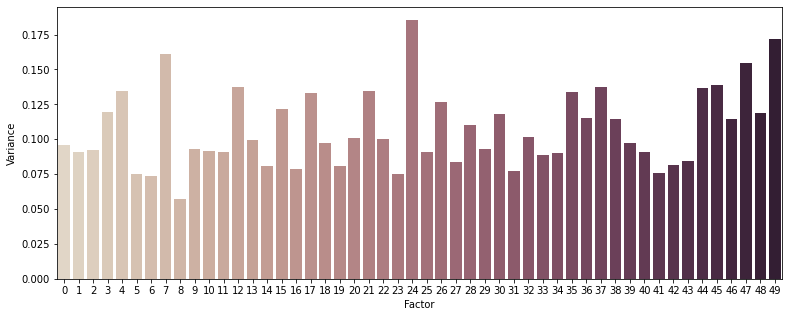

In [61]:
var_df = pd.DataFrame({"Factor": np.arange(K), "Variance": np.var(bpr.i_factors, axis=0)})
fig, ax = plt.subplots(figsize=(13, 5))
sns.barplot(x="Factor", y="Variance", data=var_df, palette="ch:.25", ax=ax);

NameError: name 'adjust_text' is not defined

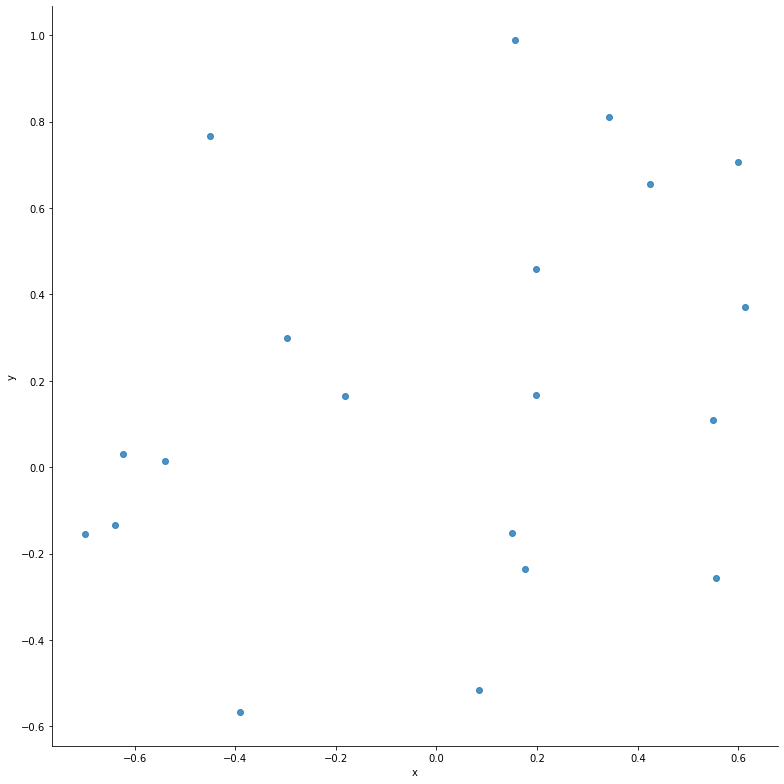

In [62]:
TOP2F = (24, 49)
SAMPLE_SIZE = 20

rng = np.random.RandomState(SEED)
sample_inds = rng.choice(np.arange(bpr.i_factors.shape[0]), size=SAMPLE_SIZE, replace=False)
sample_df = pd.DataFrame(data=bpr.i_factors[sample_inds][:, TOP2F], columns=["x", "y"])

sns.lmplot(x="x", y="y", data=sample_df, height=11.0, fit_reg=False)
item_idx2id = list(bpr.train_set.item_ids)
titles = item_df.loc[[int(item_idx2id[i]) for i in sample_inds]]["Title"].values
adjust_text(
  [plt.text(*sample_df.loc[i].values, titles[i], size=10) for i in range(len(titles))]
);

## 5. Multimodality

1. Setup

In [63]:
import os
import sys
from collections import defaultdict

import numpy as np
import pandas as pd; pd.set_option("max_colwidth", 0);
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import cornac
from cornac.utils import cache
from cornac.datasets import filmtrust, amazon_clothing
from cornac.eval_methods import RatioSplit
from cornac.models import PMF, SoRec, WMF, CTR, BPR, VBPR
from cornac.data import GraphModality, TextModality, ImageModality
from cornac.data.text import BaseTokenizer

import tensorflow as tf

print(f"System version: {sys.version}")
print(f"Cornac version: {cornac.__version__}")
print(f"Tensorflow version: {tf.__version__}")

SEED = 42
VERBOSE = False

System version: 3.6.4 (v3.6.4:d48eceb, Dec 19 2017, 06:54:40) [MSC v.1900 64 bit (AMD64)]
Cornac version: 1.15.4
Tensorflow version: 2.6.2


2. Graph Modality

Social Recommendation (SoRec)

In [64]:
K = 20
sorec = SoRec(k=K, max_iter=50, learning_rate=0.001, verbose=VERBOSE, seed=SEED)
pmf = PMF(k=K, max_iter=50, learning_rate=0.001, lambda_reg=0.01, verbose=VERBOSE, seed=SEED)

ratings = filmtrust.load_feedback()
trust = filmtrust.load_trust()

user_graph_modality = GraphModality(data=trust)

ratio_split = RatioSplit(
    data=ratings,
    test_size=0.2,
    rating_threshold=2.5,
    exclude_unknowns=True,
    user_graph=user_graph_modality,
    verbose=VERBOSE,
    seed=SEED,
)

mae = cornac.metrics.MAE()

cornac.Experiment(eval_method=ratio_split, models=[sorec, pmf], metrics=[mae]).run()

Data from https://static.preferred.ai/cornac/datasets/filmtrust/filmtrust.zip
will be cached into C:\Users\ABIR°S ELITEBOOK\.cornac\filmtrust\ratings.txt


106kB [00:02, 36.0kB/s]                                                                                                


Unzipping ...
File cached!


c:\users\abir°s elitebook\appdata\local\programs\python\python36\lib\site-packages\cornac\data\dataset.py:361: UserWarning: 3 duplicated observations are removed!
  warnings.warn("%d duplicated observations are removed!" % dup_count)



TEST:
...
      |    MAE | Train (s) | Test (s)
----- + ------ + --------- + --------
SoRec | 0.6644 |    2.0182 |   0.2559
PMF   | 0.7018 |    1.9026 |   0.3285



3. Interpreting Recommendation

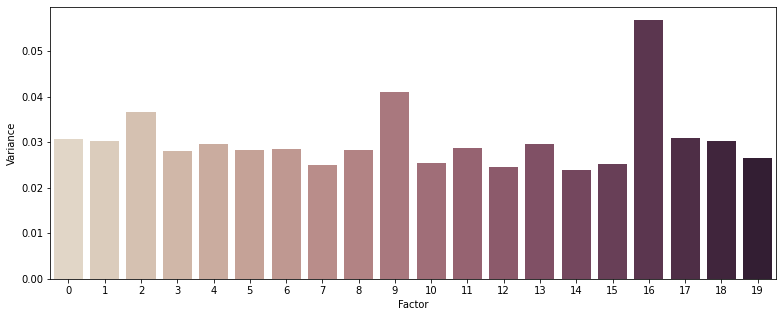

In [65]:
var_df = pd.DataFrame({"Factor": np.arange(K), "Variance": np.var(sorec.U, axis=0)})
fig, ax = plt.subplots(figsize=(13, 5))
sns.barplot(x="Factor", y="Variance", data=var_df, palette="ch:.25", ax=ax);

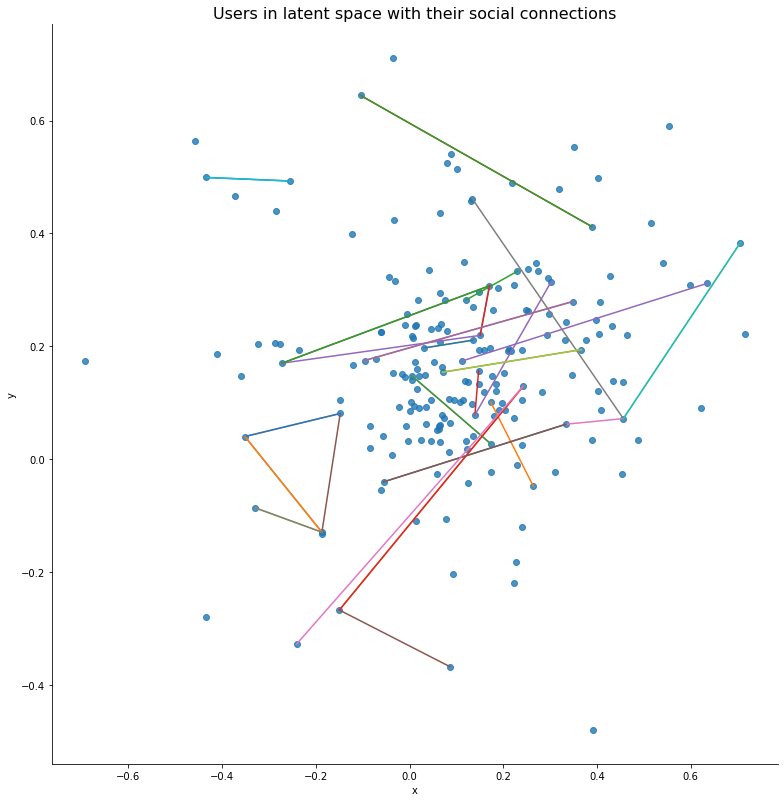

In [66]:
TOP2F = (9, 19)
SAMPLE_SIZE = 200

rng = np.random.RandomState(SEED)
sample_inds = rng.choice(np.arange(sorec.U.shape[0]), size=SAMPLE_SIZE, replace=False)
sample_df = pd.DataFrame(data=sorec.U[sample_inds][:, TOP2F], columns=["x", "y"])
g = sns.lmplot(x="x", y="y", data=sample_df, height=11.0, fit_reg=False)
g.ax.set_title("Users in latent space with their social connections", fontsize=16)

adj_mat = sorec.train_set.user_graph.matrix
for i in range(len(sample_inds)):
  for j in range(len(sample_inds)):
    if j != i and adj_mat[sample_inds[i], sample_inds[j]]:
      sns.lineplot(x="x", y="y", data=sample_df.loc[[i, j]])

4. Text Modality

Collaborative Topic Regression (CTR)

In [68]:
K = 20
ctr = CTR(k=K, max_iter=50, a=1.0, b=0.01, lambda_u=0.01, lambda_v=0.01, verbose=VERBOSE, seed=SEED)
wmf = WMF(k=K, max_iter=50, a=1.0, b=0.01, learning_rate=0.005, lambda_u=0.01, lambda_v=0.01, 
          verbose=VERBOSE, seed=SEED)

ratings = amazon_clothing.load_feedback()
docs, item_ids = amazon_clothing.load_text()

item_text_modality = TextModality(
    corpus=docs,
    ids=item_ids,
    tokenizer=BaseTokenizer(sep=" ", stop_words="english"),
    max_vocab=8000,
    max_doc_freq=0.5,
)

ratio_split = RatioSplit(
    data=ratings,
    test_size=0.2,
    rating_threshold=4.0,
    exclude_unknowns=True,
    item_text=item_text_modality,
    verbose=VERBOSE,
    seed=SEED,
)

rec_50 = cornac.metrics.Recall(50)

cornac.Experiment(eval_method=ratio_split, models=[ctr, wmf], metrics=[rec_50]).run()

Data from https://static.preferred.ai/cornac/datasets/amazon_clothing/rating.zip
will be cached into C:\Users\ABIR°S ELITEBOOK\.cornac\amazon_clothing/rating.txt


164kB [00:01, 112kB/s]                                                                                                 


Unzipping ...
File cached!
Data from https://static.preferred.ai/cornac/datasets/amazon_clothing/text.zip
will be cached into C:\Users\ABIR°S ELITEBOOK\.cornac\amazon_clothing/text.txt


475kB [00:02, 177kB/s]                                                                                                 


Unzipping ...
File cached!

TEST:
...
    | Recall@50 | Train (s) | Test (s)
--- + --------- + --------- + --------
CTR |    0.2239 |  232.8522 |   2.0341
WMF |    0.1582 |   30.1848 |   1.4923



5. Interpreting Recommendation

In [69]:
vocab = ctr.train_set.item_text.vocab
topic_word_dist = ctr.model.beta.T[:, -ctr.train_set.item_text.max_vocab:] 
top_word_inds = np.argsort(topic_word_dist, axis=1) + 4  # ingore 4 special tokens

topic_words = {}
topic_df = defaultdict(list)
print("WORD TOPICS:")
for t in range(len(topic_word_dist)):
  top_words = vocab.to_text(top_word_inds[t][-10:][::-1], sep=", ")
  topic_words[t+1] = top_words
  topic_df["Topic"].append(t + 1)
  topic_df["Top words"].append(top_words)
topic_df = pd.DataFrame(topic_df)
topic_df

WORD TOPICS:


,Topic,Top words
0,1,"belt, flatlock, case, size, better, choose, earrings, soft, warm, collar"
1,2,"shirt, style, breathable, princess, youre, colors, quality, come, people, socks"
2,3,"easy, collection, colors, rubber, water, quickly, stretch, lightweight, design, body"
3,4,"activities, handle, helmet, star, way, flat, makes, day, half, tee"
4,5,"fit, sweat, mesh, large, pocket, fleece, body, necklace, imported, travel"
5,6,"wicks, material, dry, fit, panels, piece, insect, construction, durability, standard"
6,7,"support, company, fabric, apparel, fun, sizes, hip, outdoor, fiber, features"
7,8,"x, merino, sleeve, fun, items, water, weather, bracelets, comfortable, display"
8,9,"great, performance, black, pockets, inches, make, away, design, jewelry, unique"
9,10,"fits, sun, store, engineered, pocket, shield, conditions, mobility, hat, maximum"


In [70]:
UIDX = 123
TOPK = 5

item_id2idx = ctr.train_set.iid_map
item_idx2id = list(ctr.train_set.item_ids)

print(f"USER {UIDX} TOP-3 TOPICS:")
topic_df.loc[np.argsort(ctr.U[UIDX])[-3:][::-1]]

USER 123 TOP-3 TOPICS:


,Topic,Top words
14,15,"high, storage, height, waistband, wide, way, chest, include, growth, new"
13,14,"size, comfortable, product, warm, need, ua, accessory, clean, footwear, silver"
12,13,"s, use, sure, soft, comfort, easy, products, skin, displays, moisture"


In [71]:
recommendations, scores = ctr.rank(UIDX)
print(f"\nTOP {TOPK} RECOMMENDATIONS FOR USER {UIDX}:")
rec_df = defaultdict(list)
for i in recommendations[:TOPK]:
  rec_df["URL"].append(f"https://www.amazon.com/dp/{item_idx2id[i]}")
  rec_df["Description"].append(ctr.train_set.item_text.corpus[i])
pd.DataFrame(rec_df)


TOP 5 RECOMMENDATIONS FOR USER 123:


,URL,Description
0,https://www.amazon.com/dp/B002M62ES6,Accessorize your Spider-man Costume with these Gloves. Fits most child sizes from 4-12.
1,https://www.amazon.com/dp/B002MKPKFG,"This glamorous dress is perfect for a night at the ball. The stretchy blue velvet bodice is elegantly detailed with a gathered white inlay, ruffled cap sleeves, sparkling silver trim and a white rose. The silver trimmed waist drapes outlined with ruffle capture that authentic Cinderella look.The dress is designed with an empire waist that sits 1.5 inches above the waist. They are machine washable and made for long repeated use, unlike many one-off Halloween costumes that are not made for everyday play. Our stretchy accommodating fabrics will allow for a comfortable fit for each child within the respective age ranges and there are no itchy fabrics or trims.Each dress comes with an exclusive Princess Hairbow as part of the bundle set."
2,https://www.amazon.com/dp/B001NAHW2U,LACY 14K GOLD on 925 Silver Charm BEAD compatible with European Bracelet
3,https://www.amazon.com/dp/B000HS6NEC,"Includes jacket, elastic pants, hat, belt, whistle, and gun holster. Child Size Small (4-6)."
4,https://www.amazon.com/dp/B001EDF3OU,The Child Indiana Jones Hat and Whip are two must have accessories for your child's Officially Licensed Indiana Jones costume. This Indiana Jones costume accessory contains the two hallmarks of Indy's style: his awesome whip and his trademark hat.


In [72]:
UIDX = 321

print(f"USER {UIDX} TOP-3 TOPICS:")
topic_df.loc[np.argsort(ctr.U[UIDX])[-3:][::-1]]

USER 321 TOP-3 TOPICS:


,Topic,Top words
19,20,"complete, wear, fabric, features, display, measures, merino, technology, gift, want"
2,3,"easy, collection, colors, rubber, water, quickly, stretch, lightweight, design, body"
10,11,"costume, products, small, inside, classic, lightweight, comfort, white, ideal, designed"


In [73]:
recommendations, scores = ctr.rank(UIDX)
print(f"\nTOP {TOPK} RECOMMENDATIONS FOR USER {UIDX}:")
rec_df = defaultdict(list)
for i in recommendations[:TOPK]:
  rec_df["URL"].append(f"https://www.amazon.com/dp/{item_idx2id[i]}")
  rec_df["Description"].append(ctr.train_set.item_text.corpus[i])
pd.DataFrame(rec_df)


TOP 5 RECOMMENDATIONS FOR USER 321:


,URL,Description
0,https://www.amazon.com/dp/B000MARQFA,"You demand a lot from your pants when you're on the move and the PROPPER Tactical Pant delivers. Nine pockets hold everything from your smartphone to your multi-tool. Rugged canvas fabric offers durability and strength, with DuPont Teflon fabric protector to repel stains and liquids. An action-stretch waistband adds comfort. And with our innovative wallet ""pocket in a pocket"" you'll appreciate not sitting on your wallet all day long. Come with a free matching belt (12.99 value)."
1,https://www.amazon.com/dp/B001VIH648,"You demand a lot from your pants when you're on the move and the PROPPER Tactical Pant delivers. Nine pockets hold everything from your smartphone to your multi-tool. Rugged canvas fabric offers durability and strength, with DuPont Teflon fabric protector to repel stains and liquids. An action-stretch waistband adds comfort. And with our innovative wallet ""pocket in a pocket"" you'll appreciate not sitting on your wallet all day long. Come with a free matching belt (12.99 value)."
2,https://www.amazon.com/dp/B002V44LTO,"Sleeves - Made From 50% nylon & 50% cotton. Chest & Back - Made from 40% Acrylic & 60% Cotton. Resists melting & dripping. Melting point is rated to 230 degrees Fahrenheit. Moisture wicking. Lightweight & breathable. Zippered sleeve storage pockets. Mock turtle neck. Anti abrasion padded elbow patches. Gusseted sleeves. Glint tape holder for IR tape. Loop on sleeve pockets for attaching name, rank and flag. Colors Available: Black, ACU Digital Camouflage, Olive Drab, Desert Digital Camouflage & Digitial Woodland Camouflage. Sizes to choose from: Small, Medium, Large, X-Large, 2X-Large & 3X-Large."
3,https://www.amazon.com/dp/B002FIVZD6,"TRU-SPEC is one of the leading suppliers of uniforms and personal equipment to military, law enforcement and public safety markets.&#xA0; Thousands of police, firefighters, EMTs and military personnel use and depend on our products daily. The name TRU-SPEC has become synonymous with quality, innovation and service. Gunnery Sgt. R. Lee Ermey, USMC (Ret.) known as ""The Gunny"" has become the official celebrity spokesperson for TRU-SPEC's line of tactically inspired apparel."
4,https://www.amazon.com/dp/B00062B1IC,"The PROPPER BDU trouser offers an authentic military cut in comfortable, durable Battle Rip fabric. Sewn to military specification, this button-fly BDU is fade, shrink and wrinkle resistant. It features felled seams and reinforced seat and knee for maximum durability. Six pockets with fused pocket flaps ensure a clean, professional look. With adjustable waist tabs and durable drawstring leg closures for a secure fit."


6. Image Modality

Visual Bayesian Personalized Ranking (VBPR)

In [75]:
K = 10
vbpr = VBPR(k=K, k2=K, n_epochs=50, batch_size=100, learning_rate=0.001,
            lambda_w=1, lambda_b=0.01, lambda_e=0.0, use_gpu=True, verbose=VERBOSE, seed=SEED)
bpr = BPR(k=(K * 2), max_iter=50, learning_rate=0.001, lambda_reg=0.001, verbose=VERBOSE, seed=SEED)

ratings = amazon_clothing.load_feedback()
img_features, item_ids = amazon_clothing.load_visual_feature()

item_image_modality = ImageModality(features=img_features, ids=item_ids, normalized=True)

ratio_split = RatioSplit(
    data=ratings,
    test_size=0.2,
    rating_threshold=4.0,
    exclude_unknowns=True,
    item_image=item_image_modality,
    verbose=VERBOSE,
    seed=SEED,
)

auc = cornac.metrics.AUC()

cornac.Experiment(eval_method=ratio_split, models=[vbpr, bpr], metrics=[auc]).run()

Data from https://static.preferred.ai/cornac/datasets/amazon_clothing/image.zip
will be cached into C:\Users\ABIR°S ELITEBOOK\.cornac\amazon_clothing/image_features.npy


14.9MB [00:15, 974kB/s]                                                                                                


Unzipping ...
File cached!
Data from https://static.preferred.ai/cornac/datasets/amazon_clothing/item_ids.zip
will be cached into C:\Users\ABIR°S ELITEBOOK\.cornac\amazon_clothing/item_ids.txt


32.8kB [00:00, 34.0kB/s]                                                                                               


Unzipping ...
File cached!
Optimization finished!

TEST:
...
     |    AUC | Train (s) | Test (s)
---- + ------ + --------- + --------
VBPR | 0.7053 |   81.7055 |   2.5713
BPR  | 0.5992 |    0.1763 |   2.4520



7. Interpreting Recommendation

In [76]:
UIDX = 111

item_id2idx = vbpr.train_set.iid_map
item_idx2id = list(vbpr.train_set.item_ids)
img_features = vbpr.train_set.item_image.features
item_desc = {iid: desc for desc, iid in zip(*amazon_clothing.load_text())}

print(f"RATED ITEMS BY USER {UIDX}:")
rated_items = np.nonzero(vbpr.train_set.matrix[UIDX].A)[1]
rated_df = defaultdict(list)
for i in rated_items:
  rated_df["URL"].append(f"https://www.amazon.com/dp/{item_idx2id[i]}")
  rated_df["Description"].append(item_desc[item_idx2id[i]])
pd.DataFrame(rated_df)

RATED ITEMS BY USER 111:


,URL,Description
0,https://www.amazon.com/dp/B00BXQF1XG,"Disguise Boy's Marvel Ultimate Spider-Man Classic Costume, 3T-4T Jumpsuit."
1,https://www.amazon.com/dp/B002M62ES6,Accessorize your Spider-man Costume with these Gloves. Fits most child sizes from 4-12.


In [77]:
TOPK = 5

recommendations, scores = vbpr.rank(UIDX)

print(f"\nTOP {TOPK} RECOMMENDATIONS:")
rec_df = defaultdict(list)
for i in recommendations[:TOPK]:
  cf_contrib = vbpr.beta_item[i] + np.dot(vbpr.gamma_item[i], vbpr.gamma_user[UIDX])
  vis_contrib = vbpr.visual_bias[i] + np.dot(vbpr.theta_item[i], vbpr.theta_user[UIDX])
  rec_df["URL"].append(f"https://www.amazon.com/dp/{item_idx2id[i]}")
  rec_df["Score"].append(scores[i])
  rec_df["CF Contribution"].append(cf_contrib)
  rec_df["Visual Contribution"].append(vis_contrib)
  rec_df["Description"].append(item_desc[item_idx2id[i]])
pd.DataFrame(rec_df)


TOP 5 RECOMMENDATIONS:


,URL,Score,CF Contribution,Visual Contribution,Description
0,https://www.amazon.com/dp/B002M62ES6,7.457715,1.116012,6.341702,Accessorize your Spider-man Costume with these Gloves. Fits most child sizes from 4-12.
1,https://www.amazon.com/dp/B007DLVLAW,7.312137,1.509102,5.803034,"Patented elastic shoelace and fastening system. Engineered and designed to improve performance and keep laces locked and secure throughout the course of a race, game, practice, or workout."
2,https://www.amazon.com/dp/B00BHPRRKS,6.589272,-0.176793,6.766065,Jumpsuit with muscle torso and arms attached belt.
3,https://www.amazon.com/dp/B0000CNR1L,6.477899,0.324168,6.153730,"No more digging around in deep toiletries bags for that pair of tweezers or spare safety pin you know is in there somewhere. Made of clear vinyl for quick viewing, the ten compartments on this unique organizer keep everything from dental floss to shaving cream readily retrievable. Organized in four zippered rows, the compartments vary in size and keep contents secure. When empty, the bag folds to a flat 10 by 14 inches. When filled, it can be laid inside a suitcase. The hook allows the bag to be hung inside a garment bag if desired, and then looped over a bathroom door or towel hook for accessibility. Made of PVC microfiber, the bag extends to 28 by 14 inches when fully opened.--Ann Bieri"
4,https://www.amazon.com/dp/B00BXQF1XG,6.426818,0.020040,6.406778,"Disguise Boy's Marvel Ultimate Spider-Man Classic Costume, 3T-4T Jumpsuit."


## 6.Contextual Awareness

1. Setup

In [78]:
!git clone https://github.com/srendle/libfm.git
!make all -C libfm

Cloning into 'libfm'...
'make' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [79]:
import os
import sys
from collections import defaultdict

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import cornac
from cornac.utils import cache

print(f"System version: {sys.version}")
print(f"Cornac version: {cornac.__version__}")

SEED = 42  # @param 
VERBOSE = False  # @param 

System version: 3.6.4 (v3.6.4:d48eceb, Dec 19 2017, 06:54:40) [MSC v.1900 64 bit (AMD64)]
Cornac version: 1.15.4


2. Data

In [81]:
cache("http://files.grouplens.org/datasets/hetrec2011/hetrec2011-movielens-2k-v2.zip", unzip=True)

Data from http://files.grouplens.org/datasets/hetrec2011/hetrec2011-movielens-2k-v2.zip
will be cached into C:\Users\ABIR°S ELITEBOOK\.cornac\hetrec2011-movielens-2k-v2.zip


18.9MB [00:27, 678kB/s]                                                                                                


Unzipping ...
File cached!


'C:\\Users\\ABIR°S ELITEBOOK\\.cornac\\hetrec2011-movielens-2k-v2.zip'

User-Movie ratings

In [87]:
user_ratedmovies_df = pd.read_csv(ratings_path)
user_ratedmovies_df.head()


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


User-Movie Tags

In [86]:
user_taggedmovies_df = pd.read_csv(genome_tags_path)
user_taggedmovies_df.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


Tags Info

In [88]:
tag_df = pd.read_csv(genome_scores_path)
tag_df.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


Movie Info

In [89]:
movie_df = pd.read_csv(movies_path)
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Data Statistics

In [97]:
n_users = user_ratedmovies_df.userId.nunique()
n_movies = user_ratedmovies_df.movieId.nunique()
n_tags = tag_df.tagId.nunique()

print("Number of users:", n_users)
print("Number of movies:", n_movies)
print("Number of ratings:", len(user_ratedmovies_df))
print("-" * 30)
print("Number of tags:", n_tags)
print("Number of tag assignments:", len(user_taggedmovies_df))
print("Number of tagged movies:", user_taggedmovies_df.tag.nunique())

Number of users: 162541
Number of movies: 59047
Number of ratings: 25000095
------------------------------
Number of tags: 1128
Number of tag assignments: 1128
Number of tagged movies: 1128


Data Splitting

In [98]:
train_df, test_df = train_test_split(user_ratedmovies_df, test_size=0.2, random_state=SEED)
print("Training size:", len(train_df))
print("Test size:", len(test_df))

Training size: 20000076
Test size: 5000019


3. Traditional Matrix Factorization

In [100]:
eval_method = cornac.eval_methods.BaseMethod.from_splits(
  train_data=list(train_df.itertuples(index=False)), 
  test_data=list(test_df.itertuples(index=False)),
  exclude_unknowns=False, 
  verbose=VERBOSE,
  seed=SEED,
)

mf = cornac.models.MF(
  k=10, 
  max_iter=20, 
  learning_rate=0.01, 
  lambda_reg=0.02, 
  use_bias=True,
  verbose=VERBOSE, seed=SEED,
)

test_result, _ = eval_method.evaluate(
  model=mf, metrics=[cornac.metrics.RMSE()], user_based=False
)
print(test_result)

   |   RMSE | Train (s) | Test (s)
-- + ------ + --------- + --------
MF | 0.7798 |   48.7424 | 118.1084



## 7.Explainable Recommendations

1. Setup

In [108]:
import os
import sys
from collections import defaultdict

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import cornac
from cornac.utils import cache
from cornac.datasets import amazon_toy
from cornac.eval_methods import RatioSplit
from cornac.data import Reader, SentimentModality
from cornac.models import EFM, MTER, NMF, BPR

print(f"System version: {sys.version}")
print(f"Cornac version: {cornac.__version__}")

SEED = 42
VERBOSE = False

System version: 3.6.4 (v3.6.4:d48eceb, Dec 19 2017, 06:54:40) [MSC v.1900 64 bit (AMD64)]
Cornac version: 1.15.4


2. Aspect-Level Sentiments

In [109]:
sentiment_fpath = cache(url='https://github.com/PreferredAI/static-data/raw/main/cornac/datasets/amazon_toy/sentiment.zip',
                        unzip=True, relative_path='amazon_toy/sentiment.txt')
sentiment = Reader().read(sentiment_fpath, fmt='UITup', sep=',', tup_sep=':')
samples = sentiment[:10]
pd.DataFrame.from_dict({
  "user": [tup[0] for tup in samples],
  "item": [tup[1] for tup in samples],
  "aspect-level sentiment": [tup[2] for tup in samples]
})

Data from https://github.com/PreferredAI/static-data/raw/main/cornac/datasets/amazon_toy/sentiment.zip
will be cached into C:\Users\ABIR°S ELITEBOOK\.cornac\amazon_toy/sentiment.txt


3.12MB [00:03, 900kB/s]                                                                                                


Unzipping ...
File cached!


,user,item,aspect-level sentiment
0,A012468118FTQAINEI0OQ,B00005BZM6,"[(paint, great, 1)]"
1,A012468118FTQAINEI0OQ,B001HA9JOA,"[(game, great, 1), (money, worth, 1)]"
2,A012468118FTQAINEI0OQ,B002BY2BVE,"[(paint, fun, 1), (item, well, 0)]"
3,A012468118FTQAINEI0OQ,B007U7M0LI,"[(price, sturdy, 1)]"
4,A012468118FTQAINEI0OQ,B00804BCO6,"[(gift, great, 1)]"
5,A0182108CPDLPRCXQUZQ,B002IUNLLK,"[(toy, best, 1), (heavy, cool, 1)]"
6,A0182108CPDLPRCXQUZQ,B007WYU7R8,"[(toy, great, 1)]"
7,A0182108CPDLPRCXQUZQ,B00ABY8WVO,"[(toy, love, 1)]"
8,A0182108CPDLPRCXQUZQ,B00AFP86KG,"[(toy, love, 1)]"
9,A0182108CPDLPRCXQUZQ,B00BJT861Q,"[(figure, well, 1), (toy, well, 1)]"


In [110]:
# Load rating and sentiment information
rating_fpath = cache(url='https://github.com/PreferredAI/static-data/raw/main/cornac/datasets/amazon_toy/rating.zip',
                     unzip=True, relative_path='amazon_toy/rating.txt')
rating = Reader(min_item_freq=20).read(rating_fpath, fmt='UIRT', sep=',')

# Use Sentiment Modality for aspect-level sentiment data
sentiment_modality = SentimentModality(data=sentiment)

rs = RatioSplit(
    data=rating,
    test_size=0.2,
    exclude_unknowns=True,
    sentiment=sentiment_modality,
    verbose=VERBOSE,
    seed=SEED,
)
print("Total number of aspects:", rs.sentiment.num_aspects)
print("Total number of opinions:", rs.sentiment.num_opinions)

id_aspect_map = {v:k for k, v in rs.sentiment.aspect_id_map.items()}
id_opinion_map = {v:k for k, v in rs.sentiment.opinion_id_map.items()}

Data from https://github.com/PreferredAI/static-data/raw/main/cornac/datasets/amazon_toy/rating.zip
will be cached into C:\Users\ABIR°S ELITEBOOK\.cornac\amazon_toy/rating.txt


2.32MB [00:02, 952kB/s]                                                                                                


Unzipping ...
File cached!
Total number of aspects: 429
Total number of opinions: 2604


3. Explicit Factor Model (EFM)

In [111]:
efm = EFM()
efm.train_set = rs.train_set
_, X, Y = efm._build_matrices(rs.train_set)

4. User-Aspect Attention Matrix

In [112]:
n_users = 5
n_aspects = 5
pd.DataFrame(
  data=X[:n_users, :n_aspects].A,
  index=[f"User {u + 1}" for u in np.arange(n_users)],
  columns=[f"{id_aspect_map[i]}" for i in np.arange(n_aspects)]
)

,paint,game,money,item,price
User 1,0.0,0.000000,0.0,0.000000,2.848469
User 2,0.0,0.000000,0.0,0.000000,0.000000
User 3,0.0,4.620593,0.0,2.848469,4.620593
User 4,0.0,4.856110,0.0,0.000000,0.000000
User 5,0.0,0.000000,0.0,0.000000,0.000000


5. Item-Aspect Quality Matrix

In [113]:
n_items = 5
n_aspects = 5
pd.DataFrame(
  data=Y[:n_items, :n_aspects].A,
  index=[f"Item {u + 1}" for u in np.arange(n_items)],
  columns=[f"{id_aspect_map[i]}" for i in np.arange(n_aspects)]
)

,paint,game,money,item,price
Item 1,3.924234,0.000000,3.000000,0.000000,3.924234
Item 2,0.000000,0.000000,0.000000,4.523188,4.523188
Item 3,0.000000,4.523188,0.000000,0.000000,0.000000
Item 4,0.000000,0.000000,0.000000,0.000000,3.924234
Item 5,3.924234,0.000000,3.924234,4.523188,4.523188


6. Optimization

In [114]:
efm = EFM(
  num_explicit_factors=40,
  num_latent_factors=60,
  num_most_cared_aspects=15,
  rating_scale=5.0,
  alpha=0.85,
  lambda_x=1,
  lambda_y=1,
  lambda_u=0.01,
  lambda_h=0.01,
  lambda_v=0.01,
  max_iter=100,
  verbose=VERBOSE,
  seed=SEED,
)

# compare to baseline NMF
nmf = NMF(k=100, max_iter=100, verbose=VERBOSE, seed=SEED)

eval_metrics = [
  cornac.metrics.RMSE(),
  cornac.metrics.NDCG(k=50),
  cornac.metrics.AUC()
]

cornac.Experiment(
  eval_method=rs, models=[nmf, efm], metrics=eval_metrics
).run()


TEST:
...
    |   RMSE |    AUC | NDCG@50 | Train (s) | Test (s)
--- + ------ + ------ + ------- + --------- + --------
NMF | 0.8027 | 0.5418 |  0.0093 |    6.8360 |  21.9615
EFM | 0.7315 | 0.5536 |  0.0105 |   21.9501 |  17.4458



7. Refining Ranking Prediction

In [115]:
alpha = 0.9 # alpha value in range [0,1]
num_most_cared_aspects = 100

eval_metrics = [
  cornac.metrics.NDCG(k=50),
  cornac.metrics.AUC()
]

cornac.Experiment(
  eval_method=rs,
  models=[
    EFM(
      alpha=alpha,
      num_most_cared_aspects=num_most_cared_aspects,
      init_params={'U1': efm.U1, 'U2': efm.U2, 'H1': efm.H1, 'H2': efm.H2, 'V': efm.V},
      trainable=False,
      verbose=VERBOSE,
      seed=SEED
    )
  ],
  metrics=eval_metrics
).run()


TEST:
...
    |    AUC | NDCG@50 | Train (s) | Test (s)
--- + ------ + ------- + --------- + --------
EFM | 0.5549 |  0.0107 |    0.0000 |  18.5062



8. Recommendation Explanation with EFM

In [116]:
UIDX = 1
IIDX = 4
num_top_cared_aspects = 10

id_aspect_map = {v:k for k, v in rs.sentiment.aspect_id_map.items()}

predicted_user_aspect_scores = np.dot(efm.U1[UIDX], efm.V.T)
predicted_item_aspect_scores = np.dot(efm.U2[IIDX], efm.V.T)

top_cared_aspect_ids = (-predicted_user_aspect_scores).argsort()[:num_top_cared_aspects]
top_cared_aspects = [id_aspect_map[aid] for aid in top_cared_aspect_ids]
pd.DataFrame.from_dict({
  "aspect": top_cared_aspects,
  "user_aspect_attention_score": predicted_user_aspect_scores[top_cared_aspect_ids],
  "item_aspect_quality_score": predicted_item_aspect_scores[top_cared_aspect_ids]
})


,aspect,user_aspect_attention_score,item_aspect_quality_score
0,toy,4.061583,4.679121
1,pieces,3.610667,3.844794
2,game,3.571417,4.211303
3,furby,3.571003,4.787230
4,doll,3.480350,4.326975
5,quality,3.468947,3.952712
6,really,3.368340,4.586976
7,gift,3.364289,4.410736
8,also,3.360865,4.076250
9,puzzle,3.294265,4.726531


In [117]:
perform_well_aspect = top_cared_aspects[predicted_item_aspect_scores[top_cared_aspect_ids].argmax()]
perform_poorly_aspect = top_cared_aspects[predicted_item_aspect_scores[top_cared_aspect_ids].argmin()]

explanation = \
f"You might interested in [{perform_well_aspect}], on which this product perform well. \n\
You might interested in [{perform_poorly_aspect}], on which this product perform poorly."
print("EFM explanation:")
print(explanation)

EFM explanation:
You might interested in [furby], on which this product perform well. 
You might interested in [pieces], on which this product perform poorly.


9. Multi-Task Explainable Recommendation (MTER)

Tensor#1: User by Item by Aspect ( 𝐗 )

Optimization

In [118]:
mter = MTER(
  n_user_factors=10,
  n_item_factors=10,
  n_aspect_factors=10,
  n_opinion_factors=10,
  n_bpr_samples=1000,
  n_element_samples=50,
  lambda_reg=0.1,
  lambda_bpr=10,
  max_iter=3000,
  lr=0.5,
  verbose=VERBOSE,
  seed=SEED,
)

# compare to baseline BPR
bpr = BPR(k=10, verbose=VERBOSE, seed=SEED)

eval_metrics = [
  cornac.metrics.NDCG(k=50),
  cornac.metrics.AUC()
]

# Instantiate and run an experiment
cornac.Experiment(
  eval_method=rs, models=[bpr, mter], metrics=eval_metrics,
).run()


TEST:
...
     |    AUC | NDCG@50 | Train (s) | Test (s)
---- + ------ + ------- + --------- + --------
BPR  | 0.6271 |  0.0314 |    1.2736 |  16.2731
MTER | 0.7184 |  0.0356 |  114.0390 |   7.5532



10. Recommendation Explanation with MTER

In [119]:
UIDX = 10
IIDX = 10
num_top_aspects = 2
num_top_opinions = 3

item_aspect_ids = np.array(list(set([
    tup[0]
    for idx in rs.sentiment.item_sentiment[IIDX].values()
    for tup in rs.sentiment.sentiment[idx]
])))

item_opinion_ids = np.array(list(set([
  tup[1]
  for idx in rs.sentiment.item_sentiment[IIDX].values()
  for tup in rs.sentiment.sentiment[idx]
])))

item_aspects = [id_aspect_map[idx] for idx in item_aspect_ids]

ts1 = np.einsum("abc,a->bc", mter.G1, mter.U[UIDX])
ts2 = np.einsum("bc,b->c", ts1, mter.I[IIDX])
predicted_aspect_scores = np.einsum("c,Mc->M", ts2, mter.A)

top_aspect_ids = item_aspect_ids[(-predicted_aspect_scores[item_aspect_ids]).argsort()[:num_top_aspects]]
top_aspects = [id_aspect_map[idx] for idx in top_aspect_ids]

top_aspect_opinions = []
mter_explanations = []
for top_aspect_id, top_aspect in zip(top_aspect_ids, top_aspects):
  ts1_G2 = np.einsum("abc,a->bc", mter.G2, mter.U[UIDX])
  ts2_G2 = np.einsum("bc,b->c", ts1_G2, mter.A[top_aspect_id])
  predicted_user_aspect_opinion_scores = np.einsum("c,Mc->M", ts2_G2, mter.O)

  ts1_G3 = np.einsum("abc,a->bc", mter.G3, mter.I[IIDX])
  ts2_G3 = np.einsum("bc,b->c", ts1_G3, mter.A[top_aspect_id])
  predicted_item_aspect_opinion_scores = np.einsum("c,Mc->M", ts2_G3, mter.O)

  predicted_aspect_opinion_scores = np.multiply(predicted_user_aspect_opinion_scores, predicted_item_aspect_opinion_scores)
  top_opinion_ids = item_opinion_ids[(-predicted_aspect_opinion_scores[item_opinion_ids]).argsort()[:num_top_opinions]]
  top_opinions = [id_opinion_map[idx] for idx in top_opinion_ids]
  top_aspect_opinions.append(top_opinions)

  # Generate explanation for top-1 aspect
  mter_explanations.append(f"Its {top_aspect} is [{'] ['.join(top_opinions)}].")

pd.DataFrame.from_dict({"aspect": top_aspects, "top_opinions": top_aspect_opinions, "explanation": mter_explanations})

,aspect,top_opinions,explanation
0,really,"[disappointed, great, like]",Its really is [disappointed] [great] [like].
1,addition,"[disappointed, great, fun]",Its addition is [disappointed] [great] [fun].


## 8. Recommendation Retrieval

1. Setup

In [120]:
import os
import sys
import time
import random
import pickle
from operator import itemgetter
from collections import defaultdict

import tqdm.auto as tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import cornac
from cornac.utils import cache
from cornac.datasets import movielens
from cornac.eval_methods import RatioSplit
from cornac.models import PMF, BPR, IBPR

print(f"System version: {sys.version}")
print(f"Cornac version: {cornac.__version__}")

SEED = 42
VERBOSE = True

System version: 3.6.4 (v3.6.4:d48eceb, Dec 19 2017, 06:54:40) [MSC v.1900 64 bit (AMD64)]
Cornac version: 1.15.4


2. Recommendation Retrieval is a Similarity Search Problem

Probabilistic Matrix Factorization

In [122]:
# Load the MovieLens 1M dataset
ml_1m = movielens.load_feedback(variant='1M')

Data from http://files.grouplens.org/datasets/movielens/ml-1m.zip
will be cached into C:\Users\ABIR°S ELITEBOOK\.cornac\ml-1m/ratings.dat


5.93MB [00:07, 809kB/s]                                                                                                


Unzipping ...
File cached!


In [123]:
# Instantiate an evaluation method
ratio_split = RatioSplit(
  data=ml_1m, test_size=0.4, rating_threshold=1.0, exclude_unknowns=False
)

# Instatiate a PMF recommender model
pmf = PMF(k=100, max_iter=100, learning_rate=0.01, seed=SEED, verbose=VERBOSE)

# Instantiate evaluation metrics.
rec_10 = cornac.metrics.Recall(k=10)
pre_10 = cornac.metrics.Precision(k=10)

# Instantiate and then run an experiment.
cornac.Experiment(
  eval_method=ratio_split, models=[pmf], metrics=[rec_10, pre_10]
).run()

Learning...
epoch 0, loss: 46446.437359
epoch 1, loss: 31039.587228
epoch 2, loss: 26292.722854
epoch 3, loss: 23537.796579
epoch 4, loss: 21905.739985
epoch 5, loss: 20909.647345
epoch 6, loss: 20276.064965
epoch 7, loss: 19857.775861
epoch 8, loss: 19571.087101
epoch 9, loss: 19368.855192
epoch 10, loss: 19216.540907
epoch 11, loss: 19098.818901
epoch 12, loss: 19003.454192
epoch 13, loss: 18920.857389
epoch 14, loss: 18852.247112
epoch 15, loss: 18792.720270
epoch 16, loss: 18739.251739
epoch 17, loss: 18692.518544
epoch 18, loss: 18652.897676
epoch 19, loss: 18613.028384
epoch 20, loss: 18582.563521
epoch 21, loss: 18550.761537
epoch 22, loss: 18523.364641
epoch 23, loss: 18500.604950
epoch 24, loss: 18474.311675
epoch 25, loss: 18456.770036
epoch 26, loss: 18434.663482
epoch 27, loss: 18419.012733
epoch 28, loss: 18400.505275
epoch 29, loss: 18384.860687
epoch 30, loss: 18369.677467
epoch 31, loss: 18355.408934
epoch 32, loss: 18340.639532
epoch 33, loss: 18329.472617
epoch 34, lo

3. Exhaustive Search

Observation #1: Retrieval time scales linearly with the number of items

In [124]:
comp_time = []

# For each user vector, we compute the inner product score to each item vector
pmf_item_vect = pmf.V
pmf_user_vect = pmf.U

for incr_size in tqdm.trange(0, pmf_item_vect.shape[0], 10, disable=not VERBOSE):
  start_time = time.time()
  pred = np.matmul(pmf_item_vect[:incr_size, :], pmf_user_vect.T)
  end_time = time.time()
  comp_time.append((end_time - start_time) / pmf_user_vect.shape[0])

100%|████████████████████████████████████████████████████████████████████████████████| 364/364 [00:28<00:00, 12.68it/s]


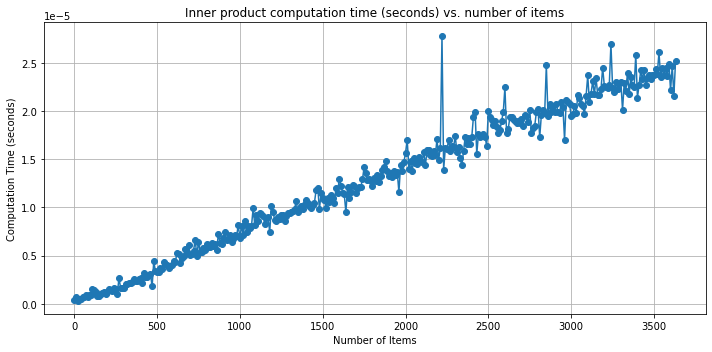

In [125]:
# plot the computation time as the number of items increases
plt.plot(range(0, pmf_item_vect.shape[0],10), comp_time, marker='o', 
         label='Computation_time')
plt.xlabel('Number of Items')
plt.ylabel('Computation Time (seconds)')
plt.title('Inner product computation time (seconds) vs. number of items')
plt.grid()
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

Observation #2: Retrieval time scales linearly with the number of latent factors

In [126]:
comp_time = []

for d in tqdm.trange(pmf.k, disable=not VERBOSE):
  start_time = time.time()
  pred = np.matmul(pmf_item_vect[:incr_size, :d], pmf_user_vect[:,:d].T)
  end_time = time.time()
  
  # average the computation time 
  comp_time.append((end_time - start_time) / pmf_user_vect.shape[0])

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.42it/s]


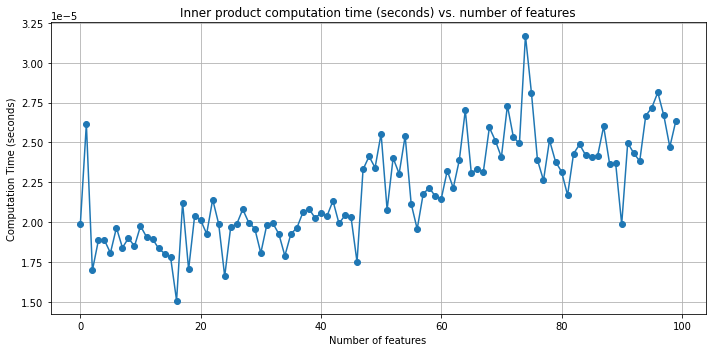

In [127]:
# plot the computation time as the number of dimension increases
plt.plot(range(pmf.k), comp_time, marker='o', label='Computation_time')
plt.title('Inner product computation time (seconds) vs. number of features')
plt.xlabel('Number of features')
plt.ylabel('Computation Time (seconds)')
plt.grid()
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

4. Scalable Recommendation Retrieval with Locality Sensitive Hashing

Locality Sensitive Hashing

In [129]:
random.seed(SEED)

# Implementation of Locality Sensitive Hashing for Maximum Cosine Similarity Search
class LSHIndex:

  def __init__(self, hash_family, k, L):
    self.hash_family = hash_family
    self.k = k
    self.L = 0
    self.hash_tables = []
    self.resize(L)

  def resize(self, L):
    """ update the number of hash tables to be used """
    if L < self.L:
      self.hash_tables = self.hash_tables[:L]
    else:
      # initialise a new hash table for each hash function
      hash_funcs = [[self.hash_family.create_hash_func() for h in range(self.k)] 
                    for l in range(self.L, L)]
      self.hash_tables.extend([(g, defaultdict(lambda:[])) for g in hash_funcs])

  def hash(self, g, p):
    return self.hash_family.combine([h.hash(p) for h in g])

  def index(self, points):
    """ index the supplied points """
    self.points = points
    for g, table in self.hash_tables:
        for ix, p in enumerate(self.points):
            table[self.hash(g,p)].append(ix)
    # reset stats
    self.tot_touched = 0
    self.num_queries = 0

  def query(self, q, metric, max_results):
    """ find the max_results closest indexed points to q according to the supplied metric """
    candidates = set()
    for g, table in self.hash_tables:
        matches = table.get(self.hash(g,q), [])
        candidates.update(matches)
        
    # update stats
    self.tot_touched += len(candidates)
    self.num_queries += 1
    
    # rerank candidates
    candidates = [(ix, metric(q, self.points[ix])) for ix in candidates]
    candidates.sort(key = itemgetter(1))
    return candidates[:max_results]

  def get_avg_touched(self):
    """ mean number of candidates inspected per query """
    return self.tot_touched/self.num_queries


#################################################################################################
#--------------------------------- Cosine LSH Hash Family --------------------------------------#
#################################################################################################    
class CosineHashFamily:

  def __init__(self,d):
    self.d = d

  def create_hash_func(self):
    # each CosineHash is initialised with a random projection vector
    return CosineHash(self.rand_vec())

  def rand_vec(self):
    return [random.gauss(0,1) for i in range(self.d)]

  def combine(self, hashes):
    """combine by treating as a bitvector"""
    return sum(2**i if h > 0 else 0 for i,h in enumerate(hashes))
	
class CosineHash:

  def __init__(self, r):
    self.r = r

  def hash(self, vec):
    return self.sgn(dot(vec, self.r))

  def sgn(self,x):
    return int(x > 0)

#--- inner product ---
def dot(u,v):
	return np.dot(u, v) 

#-- cosine distance ---
def cosine_distance(u,v):
	return 1 - dot(u,v)/(dot(u,u)*dot(v,v))**0.5

In [130]:
# helper function to measure precision, recall, and touched values 
# of using LSH for top-k recommendation retrieval
# ------------------------------------------------------------------------
def evaluate_LSHTopK(test_data, item_vect, user_vect, lsh_index, sim_metric, topK):           

  lsh_prec = 0.0
  lsh_recall = 0.0
  
  #build index
  lsh_index.index(item_vect.tolist())
  
  for id in range(user_vect.shape[0]):      
    test_item_ids = list(test_data.csr_matrix.getrow(id).nonzero()[1])

    if len(test_item_ids) > 0:
      # top-k by LSH
      lsh_rec_list = list(map(itemgetter(0), lsh_index.query(user_vect[id, :], sim_metric, topK)))
      lsh_overlaps = list(set(lsh_rec_list).intersection(test_item_ids))

      lsh_prec   += len(lsh_overlaps) * 1.0/topK
      lsh_recall += len(lsh_overlaps) * 1.0/len(test_item_ids)

  touched = lsh_index.get_avg_touched() * 1.0/item_vect.shape[0]
  return lsh_prec/user_vect.shape[0], lsh_recall/user_vect.shape[0], touched

5. Issue with Using Locality Sensitive Hashing for Recommendation Retrieval

Solution I: Vector Augmentation

In [131]:
#apply vector augmentation
M = np.linalg.norm(pmf_item_vect, axis=1) # compute item vector norms
max_norm = max(M) # max item norm

xbox_item_vect = np.concatenate(
  (pmf_item_vect, np.sqrt(max_norm**2 - pow(M, 2)).reshape(pmf_item_vect.shape[0], -1)), 
  axis=1
)
xbox_user_vect = np.concatenate(
  (pmf_user_vect, np.zeros((pmf_user_vect.shape[0], 1))), 
  axis=1
)

Effectiveness of Vector Augmentation

In [134]:
topK = 10  # @param - top-K value
b_vals = [4, 8]  # @param - number of hash function
L_vals = [10, 20]  # @param - number of hashtables

test_data = ratio_split.test_set  # testing data

print('#table \t#bit \t ?Augmented \t lsh_prec@{0} \t lsh_recall@{0} \t touched'.format(topK))
for nt in L_vals:
    for b in b_vals:
        # init lsh index:
        # ------ hash-family: the LSH scheme/family
        # ------ k          : number of hash functions
        # ------ L          : number of hash tables
        lsh_index = LSHIndex(hash_family=CosineHashFamily(xbox_item_vect.shape[1]), k=b, L=nt)

        # performance without employing vector augmentation
        print('---------------------------------------------------------------------------------')
        prec_1, recall_1, touched_1 = evaluate_LSHTopK(
            test_data, xbox_item_vect, -xbox_user_vect[:1000], lsh_index, dot, topK
        )
        print("{}\t{}\t{}\t{:.4f}\t{:.4f}\t{:.4f}".format(nt, b, 'No', prec_1, recall_1, touched_1))

        # performance with vector augmentation
        prec_2, recall_2, touched_2 = evaluate_LSHTopK(
            test_data, xbox_item_vect, -xbox_user_vect[:1000], lsh_index, dot, topK
        )
        print("{}\t{}\t{}\t{:.4f}\t{:.4f}\t{:.4f}".format(nt, b, 'Yes', prec_2, recall_2, touched_2))

#table 	#bit 	 ?Augmented 	 lsh_prec@10 	 lsh_recall@10 	 touched
---------------------------------------------------------------------------------
10	4	No	0.1108	0.0108	0.4637
10	4	Yes	0.1108	0.0108	0.4637
---------------------------------------------------------------------------------
10	8	No	0.0629	0.0050	0.0326
10	8	Yes	0.0629	0.0050	0.0326
---------------------------------------------------------------------------------
20	4	No	0.1239	0.0125	0.7747
20	4	Yes	0.1239	0.0125	0.7747
---------------------------------------------------------------------------------
20	8	No	0.0751	0.0064	0.0674
20	8	Yes	0.0751	0.0064	0.0674


Solution II: Indexable Representation Learning

Bayesian Personalized Ranking - BPR

In [135]:
rec_bpr = BPR(k=20, max_iter=100, learning_rate=0.001, seed=SEED, verbose=VERBOSE)

cornac.Experiment(
  eval_method=ratio_split, models=[rec_bpr], metrics=[rec_10, pre_10],
).run()

100%|█████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.21it/s, correct=83.58%, skipped=6.40%]


Optimization finished!

TEST:
...
    | Precision@10 | Recall@10 | Train (s) | Test (s)
--- + ------------ + --------- + --------- + --------
BPR |       0.1849 |    0.0453 |   19.2212 |  12.2717



In [136]:
bpr_user_vect  = rec_bpr.u_factors
bpr_item_vect  = rec_bpr.i_factors

# apply Xbox transformation
M = np.linalg.norm(bpr_item_vect, axis=1) # compute item vector norms
max_norm = max(M) # max item norm

xbox_bpr_item_vect = np.concatenate(
  (bpr_item_vect, np.sqrt(max_norm**2 - pow(M, 2)).reshape(bpr_item_vect.shape[0], -1)), 
  axis=1
)
xbox_bpr_user_vect = np.concatenate(
  (bpr_user_vect, np.zeros((bpr_user_vect.shape[0], 1))), 
  axis = 1
)

In [137]:
topK = 10 # @param
b_vals = [4, 8] # @param
L_vals = [10, 20] # @param

test_data  = ratio_split.test_set # testing data

print('#table\t #bit \t model \t lsh_prec@{0} \t lsh_recall@{0} \t touched'.format(topK))
for nt in L_vals:
  print('------------------------------------------------------------------------------')
  for b in b_vals: 
    # lsh index:
    #------ hash-family: the LSH scheme/family 
    #------ k          : number of hash functions
    #------ L          : number of hash tables
    lsh_index = LSHIndex(hash_family = CosineHashFamily(xbox_bpr_item_vect.shape[1]), k = b, L = nt)
    
    lsh_bpr_prec, lsh_bpr_recall, touched_bpr = evaluate_LSHTopK(
      test_data, xbox_bpr_item_vect, -xbox_bpr_user_vect[:1000, :], lsh_index, dot, topK
    )
    print("{}\t{}\t{}\t{:.4f}\t{:.4f}\t{:.4f}".format(
      nt, b, 'BPR', lsh_bpr_prec, lsh_bpr_recall, touched_bpr)
    )

#table	 #bit 	 model 	 lsh_prec@10 	 lsh_recall@10 	 touched
------------------------------------------------------------------------------
10	4	BPR	0.0384	0.0024	0.4886
10	8	BPR	0.0289	0.0023	0.0433
------------------------------------------------------------------------------
20	4	BPR	0.0416	0.0027	0.7335
20	8	BPR	0.0351	0.0026	0.0874


Indexable Bayesian Personalized Ranking - IBPR

In [138]:
rec_ibpr = IBPR(k=20, max_iter=15, learning_rate=0.001, verbose=VERBOSE)

cornac.Experiment(
  eval_method=ratio_split, models =[rec_ibpr], metrics=[rec_10, pre_10]
).run()

Epoch 15/15: 100%|█████████████████████████████████████████████████████| 6002/6002 [01:17<00:00, 77.19it/s, loss=0.388]



TEST:
...
     | Precision@10 | Recall@10 | Train (s) | Test (s)
---- + ------------ + --------- + --------- + --------
IBPR |       0.1631 |    0.0363 | 1107.9771 |   6.7924



In [139]:
ibpr_user_vect = rec_ibpr.U
ibpr_item_vect = rec_ibpr.V

In [140]:
topK = 10 # @param
b_vals = [4, 8] # @param 
L_vals = [10, 20] # @param

test_data = ratio_split.test_set # testing data

print('#table\t #bit \t model \t lsh_prec@{0} \t lsh_recall@{0} \t touched'.format(topK))
for nt in L_vals:
  print('------------------------------------------------------------------------------')
  for b in b_vals: 
    # lsh index:
    #------ hash-family: the LSH scheme/family 
    #------ k          : number of hash functions
    #------ L          : number of hash tables
    lsh_index = LSHIndex(hash_family = CosineHashFamily(ibpr_item_vect.shape[1]), k = b, L = nt)
    
    lsh_ibpr_prec, lsh_ibpr_recall, touched_ibpr = evaluate_LSHTopK(
      test_data, ibpr_item_vect, -ibpr_user_vect[:1000,:], lsh_index, dot, topK
    )
    print("{}\t{}\t{}\t{:.4f}\t{:.4f}\t{:.4f}".format(
      nt, b, 'IBPR', lsh_ibpr_prec, lsh_ibpr_recall, touched_ibpr)
    ) 

#table	 #bit 	 model 	 lsh_prec@10 	 lsh_recall@10 	 touched
------------------------------------------------------------------------------
10	4	IBPR	0.0788	0.0055	0.6594
10	8	IBPR	0.0289	0.0017	0.5149
------------------------------------------------------------------------------
20	4	IBPR	0.0845	0.0068	0.7097
20	8	IBPR	0.0424	0.0027	0.5339


## 9.Deep Learning

In [141]:
import os
import sys

import cornac
from cornac.data import Reader
from cornac.datasets import movielens, citeulike
from cornac.eval_methods import RatioSplit
from cornac.models import GMF, MLP, NeuMF, VAECF, CDL, ConvMF, WMF, CTR 
from cornac.data import TextModality
from cornac.data.text import BaseTokenizer

import tensorflow as tf

print(f"System version: {sys.version}")
print(f"Cornac version: {cornac.__version__}")
print(f"Tensorflow version: {tf.__version__}")

SEED = 42
VERBOSE = True

System version: 3.6.4 (v3.6.4:d48eceb, Dec 19 2017, 06:54:40) [MSC v.1900 64 bit (AMD64)]
Cornac version: 1.15.4
Tensorflow version: 2.6.2


2. Deep Learning for Collaborative Filtering

Neural Collaborative Filtering

In [142]:
GMF_FACTORS = 8  # @param
MLP_LAYERS = [32, 16, 8]  # @param
ACTIVATION = "tanh"  # @param ["tanh", "sigmoid", "relu", "leaky_relu"]
NEG_SAMPLES = 3  # @param
NUM_EPOCHS = 10  # @param 
BATCH_SIZE = 256  # @param
LEARNING_RATE = 0.001  # @param

gmf = GMF(num_factors=GMF_FACTORS, num_epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, 
          num_neg=NEG_SAMPLES, lr=LEARNING_RATE, seed=SEED, verbose=VERBOSE)
mlp = MLP(layers=MLP_LAYERS, act_fn=ACTIVATION, num_epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, 
          num_neg=NEG_SAMPLES, lr=LEARNING_RATE, seed=SEED, verbose=VERBOSE)
neumf = NeuMF(num_factors=GMF_FACTORS, layers=MLP_LAYERS, act_fn=ACTIVATION, num_epochs=NUM_EPOCHS,
              num_neg=NEG_SAMPLES, batch_size=BATCH_SIZE, lr=LEARNING_RATE, seed=SEED, verbose=VERBOSE)

wmf = WMF(k=GMF_FACTORS, max_iter=200, learning_rate=0.001, seed=SEED, verbose=VERBOSE)

ml_100k = movielens.load_feedback(variant="100K", reader=Reader(bin_threshold=4.0))
ratio_split = RatioSplit(
  data=ml_100k, test_size=0.2, exclude_unknowns=True, seed=SEED, verbose=VERBOSE
)
ndcg_50 = cornac.metrics.NDCG(k=50)
rec_50 = cornac.metrics.Recall(k=50)

cornac.Experiment(
  eval_method=ratio_split,
  models=[gmf, mlp, neumf, wmf],
  metrics=[ndcg_50, rec_50],
).run()

rating_threshold = 1.0
exclude_unknowns = True
---
Training data:
Number of users = 942
Number of items = 1420
Number of ratings = 44300
Max rating = 1.0
Min rating = 1.0
Global mean = 1.0
---
Test data:
Number of users = 921
Number of items = 1067
Number of ratings = 11044
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 942
Total items = 1420

[GMF] Training started!


100%|██████████████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.29s/it, loss=0.394]



[GMF] Evaluation started!


Ranking: 100%|██████████████████████████████████████████████████████████████████████| 921/921 [00:01<00:00, 880.16it/s]



[MLP] Training started!


100%|██████████████████████████████████████████████████████████████████████| 10/10 [00:36<00:00,  3.62s/it, loss=0.403]



[MLP] Evaluation started!


Ranking: 100%|██████████████████████████████████████████████████████████████████████| 921/921 [00:01<00:00, 678.53it/s]



[NeuMF] Training started!


100%|██████████████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.26s/it, loss=0.323]



[NeuMF] Evaluation started!


Ranking: 100%|██████████████████████████████████████████████████████████████████████| 921/921 [00:01<00:00, 534.98it/s]



[WMF] Training started!


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:10<00:00, 18.75it/s, loss=2.92]


Learning completed!

[WMF] Evaluation started!


Ranking: 100%|█████████████████████████████████████████████████████████████████████| 921/921 [00:00<00:00, 1282.43it/s]


TEST:
...
      | NDCG@50 | Recall@50 | Train (s) | Test (s)
----- + ------- + --------- + --------- + --------
GMF   |  0.1609 |    0.2778 |   44.3356 |   1.0547
MLP   |  0.1630 |    0.2807 |   36.5369 |   1.3604
NeuMF |  0.2412 |    0.4268 |   43.0649 |   1.7286
WMF   |  0.1976 |    0.3753 |   10.8313 |   0.7222



Variational Autoencoder for Collaborative Filtering (VAECF)

In [143]:
NUM_FACTORS = 25  # @param
AE_LAYERS = [100, 50]  # @param
ACTIVATION = "tanh"  # @param ["tanh", "sigmoid", "relu", "leaky_relu"]
LIKELIHOOD = "bern"  # @param ["bern", "mult", "gaus", "pois"]
NUM_EPOCHS = 600  # @param 
BATCH_SIZE = 256  # @param
LEARNING_RATE = 0.001  # @param

vaecf = VAECF(k=NUM_FACTORS, autoencoder_structure=AE_LAYERS, act_fn=ACTIVATION,
              likelihood=LIKELIHOOD, n_epochs=NUM_EPOCHS, batch_size=BATCH_SIZE,
              learning_rate=LEARNING_RATE, seed=SEED, verbose=VERBOSE, use_gpu=True)

wmf = WMF(k=NUM_FACTORS, max_iter=200, learning_rate=0.001, seed=SEED, verbose=VERBOSE)

ml_100k = movielens.load_feedback(variant="100K", reader=Reader(bin_threshold=4.0))
ratio_split = RatioSplit(
  data=ml_100k, test_size=0.2, exclude_unknowns=True, seed=SEED, verbose=VERBOSE
)

cornac.Experiment(
  eval_method=ratio_split, models=[vaecf, wmf], metrics=[rec_50, ndcg_50],
).run()

rating_threshold = 1.0
exclude_unknowns = True
---
Training data:
Number of users = 942
Number of items = 1420
Number of ratings = 44300
Max rating = 1.0
Min rating = 1.0
Global mean = 1.0
---
Test data:
Number of users = 921
Number of items = 1067
Number of ratings = 11044
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 942
Total items = 1420

[VAECF] Training started!


100%|████████████████████████████████████████████████████████████████████| 600/600 [01:33<00:00,  6.44it/s, loss=0.778]



[VAECF] Evaluation started!


Ranking: 100%|██████████████████████████████████████████████████████████████████████| 921/921 [00:02<00:00, 386.68it/s]



[WMF] Training started!


100%|█████████████████████████████████████████████████████████████████████| 200/200 [00:11<00:00, 17.81it/s, loss=1.85]


Learning completed!

[WMF] Evaluation started!


Ranking: 100%|█████████████████████████████████████████████████████████████████████| 921/921 [00:00<00:00, 1236.44it/s]


TEST:
...
      | NDCG@50 | Recall@50 | Train (s) | Test (s)
----- + ------- + --------- + --------- + --------
VAECF |  0.2418 |    0.4268 |   93.3921 |   2.3928
WMF   |  0.2045 |    0.3958 |   11.4778 |   0.7509



3. Deep Learning for Content-Based Filtering

Collaborative Deep Learning (CDL)

In [144]:
VOCAB_SIZE = 2000  # @param
NUM_FACTORS = 50  # @param
AE_LAYERS = [500, 100]  # @param
ACTIVATION = "tanh"  # @param ["tanh", "sigmoid", "relu", "leaky_relu"]
A = 1.0  # @param
B = 0.01  # @param
LAMBDA_U = 0.1  # @param
LAMBDA_V = 0.1  # @param
LAMBDA_W = 0.1  # @param
LAMBDA_N = 10.0  # @param
CORRUPTION_RATE = 0.3  # @param
DROPOUT_RATE = 0.1  # @param
NUM_EPOCHS = 100  # @param 
BATCH_SIZE = 100  # @param
LEARNING_RATE = 0.001  # @param

cdl = CDL(k=NUM_FACTORS, autoencoder_structure=AE_LAYERS, act_fn=ACTIVATION, a=A, b=B,
          lambda_u=LAMBDA_U, lambda_v=LAMBDA_V, lambda_w=LAMBDA_W, lambda_n=LAMBDA_N,
          corruption_rate=CORRUPTION_RATE, dropout_rate=DROPOUT_RATE, vocab_size=VOCAB_SIZE,
          max_iter=NUM_EPOCHS, batch_size=BATCH_SIZE, seed=SEED, verbose=VERBOSE)

ctr = CTR(k=NUM_FACTORS, max_iter=NUM_EPOCHS, a=A, b=B, lambda_u=LAMBDA_U, lambda_v=LAMBDA_V, seed=SEED, verbose=VERBOSE)

plots, movie_ids = movielens.load_plot()
feedback = movielens.load_feedback(variant="100k", reader=Reader(item_set=movie_ids, bin_threshold=4.0))
item_text_modality = TextModality(
  corpus=plots, ids=movie_ids, tokenizer=BaseTokenizer(sep="\t", stop_words="english"), max_vocab=VOCAB_SIZE,
)

ratio_split = RatioSplit(
  data=feedback, 
  test_size=0.2, 
  exclude_unknowns=True, 
  item_text=item_text_modality, 
  seed=SEED, verbose=VERBOSE,
)

cornac.Experiment(eval_method=ratio_split, models=[cdl, ctr], metrics=[rec_50, ndcg_50]).run()

Data from https://static.preferred.ai/cornac/datasets/movielens/ml_plot.zip
will be cached into C:\Users\ABIR°S ELITEBOOK\.cornac\movielens/ml_plot.dat


3.60MB [00:03, 1.09MB/s]                                                                                               


Unzipping ...
File cached!
rating_threshold = 1.0
exclude_unknowns = True
---
Training data:
Number of users = 942
Number of items = 1299
Number of ratings = 42303
Max rating = 1.0
Min rating = 1.0
Global mean = 1.0
---
Test data:
Number of users = 921
Number of items = 978
Number of ratings = 10536
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 942
Total items = 1299

[CDL] Training started!


100%|██████████████████████████████████████████████████████████████████████| 100/100 [00:49<00:00,  2.03it/s, loss=3.1]


Learning completed!

[CDL] Evaluation started!


Ranking: 100%|██████████████████████████████████████████████████████████████████████| 921/921 [00:00<00:00, 950.62it/s]



[CTR] Training started!


100%|██████████████████████████████████████████| 100/100 [06:59<00:00,  4.19s/it, cf_loss=711, lda_likelihood=-1.69e+5]


Learning completed!

[CTR] Evaluation started!


Ranking: 100%|█████████████████████████████████████████████████████████████████████| 921/921 [00:00<00:00, 1365.86it/s]


TEST:
...
    | NDCG@50 | Recall@50 | Train (s) | Test (s)
--- + ------- + --------- + --------- + --------
CDL |  0.2063 |    0.4067 |   50.4796 |   0.9821
CTR |  0.1864 |    0.3343 |  419.2536 |   0.6793



Convolutional Matrix Factorization (ConvMF)

In [145]:
VOCAB_SIZE = 2000  # @param
NUM_FACTORS = 5  # @param
HIDDEN_DIM = 50  # @param
CNN_FILTER_SIZES = [2, 3, 4, 5]  # @param
CNN_NUM_FILTERS = 128  # @param
WORD_EMB_DIM = 32  # @param
SEQ_MAX_LENGTH = 50  # @param
DROPOUT_RATE = 0.2  # @param
LAMBDA_U = 0.1  # @param
LAMBDA_V = 0.1  # @param
NUM_EPOCHS = 5  # @param
CNN_EPOCHS = 3  # @param
CNN_BATCH_SIZE = 256  # @param
CNN_LEARNING_RATE = 0.001  # @param

convmf = ConvMF(k=NUM_FACTORS, n_epochs=NUM_EPOCHS, cnn_epochs=CNN_EPOCHS, cnn_bs=CNN_BATCH_SIZE,
                cnn_lr=CNN_LEARNING_RATE, emb_dim=WORD_EMB_DIM, max_len=SEQ_MAX_LENGTH,
                filter_sizes=CNN_FILTER_SIZES, num_filters=CNN_NUM_FILTERS, hidden_dim=HIDDEN_DIM, 
                dropout_rate=DROPOUT_RATE, lambda_u=LAMBDA_U, lambda_v=LAMBDA_V,
                seed=SEED, verbose=VERBOSE)

plots, movie_ids = movielens.load_plot()
feedback = movielens.load_feedback(variant="100k", reader=Reader(item_set=movie_ids))
item_text_modality = TextModality(
  corpus=plots, ids=movie_ids, tokenizer=BaseTokenizer(sep="\t", stop_words="english"), max_vocab=VOCAB_SIZE,
)

ratio_split = RatioSplit(
  data=feedback, 
  test_size=0.2, 
  rating_threshold=4.0, 
  exclude_unknowns=True, 
  item_text=item_text_modality, 
  seed=SEED, 
  verbose=VERBOSE
)

rmse = cornac.metrics.RMSE()

cornac.Experiment(
  eval_method=ratio_split, models=[convmf], metrics=[rmse, rec_50], user_based=False
).run()

rating_threshold = 4.0
exclude_unknowns = True
---
Training data:
Number of users = 943
Number of items = 1518
Number of ratings = 75846
Max rating = 5.0
Min rating = 1.0
Global mean = 3.5
---
Test data:
Number of users = 942
Number of items = 1279
Number of ratings = 18933
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 943
Total items = 1518

[ConvMF] Training started!
Epoch: 1/5


Optimizing CNN: 100%|████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.82it/s]


Loss: 321274.68127 Elapsed: 1.9802s Converge: 32127468127409099921380107554808832716776590359807393792.000000 
Epoch: 2/5


Optimizing CNN: 100%|████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.89it/s]


Loss: 67855.52837 Elapsed: 1.9873s Converge: 0.788793 
Epoch: 3/5


Optimizing CNN: 100%|████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.90it/s]


Loss: 65869.62258 Elapsed: 1.9830s Converge: 0.029267 
Epoch: 4/5


Optimizing CNN: 100%|████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.88it/s]


Loss: 68624.45065 Elapsed: 2.0131s Converge: 0.041822 
Epoch: 5/5


Optimizing CNN: 100%|████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.77it/s]


Loss: 71809.31024 Elapsed: 2.1156s Converge: 0.046410 

[ConvMF] Evaluation started!


Ranking: 100%|█████████████████████████████████████████████████████████████████████| 942/942 [00:00<00:00, 2125.08it/s]


TEST:
...
       |   RMSE | Recall@50 | Train (s) | Test (s)
------ + ------ + --------- + --------- + --------
ConvMF | 0.9806 |    0.0083 |   10.6571 |   1.0366

